In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings as wrn
from matplotlib import style
from seaborn import countplot
from matplotlib import style
#import bootstrapped.bootstrap as bs
#import bootstrapped.stats_functions as bs_stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

wrn.filterwarnings('ignore')

<b> ********** Import the data | Start  **********<b>

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv',sep=',',encoding='ISO-8859-1')

In [3]:
## ***** To check the columns and the data with nulls ****** | Start ####
df.info()
## ***** To check the columns and the data with nulls ****** | End 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

<b> Seems that there is no null values </b>

<b> ********** Import the data | End  **********<b>

In [5]:
### ******* Define the functions ******** | Start


## **** Box Plot function **** |Start
def plotbox(collist):
    
    for i in range(len(collist)):
        if collist[i] not in ('CarModel','enginelocation','CarMfg'):
            sns.set(style="darkgrid")
            sns.set_context('talk')
            #fig,ax=plt.subplots()
            plt.figure(figsize=(50,30))
            plt.subplot(4,3,i+1)
            sns.boxplot(x=collist[i],y='price',data=df_price,palette=("Pastel2"))
            plt.title('Figure ' + str(11+i+1) +' -  '+ collist[i]+ ' against Price')
    plt.show()
## **** Box Plot function **** |End

## **** Bar Plot function **** |Start
def plotbar(collist,df):
    plt.figure(figsize=(15,6))
    for i in range(0,len(collist)):
        if collist[i] not in ('CarModel','enginelocation'):
            #plt.subplot(5,2,i+1)
            ax = (df[collist[i]].value_counts(normalize=True)*100).plot.bar(color=sns.color_palette('deep', 16))
            ax.set_ylabel('% in dataset', fontsize=16)
            ax.set_xlabel(collist[i], fontsize=10)
            plt.title('Figure ' + str(i+1) +' - % type of '+ collist[i]+ ' used in cars')
            x_offset = -0.03
            y_offset = 0.02
            for p in ax.patches:
                b = p.get_bbox()
                val = "{:+.2f}".format(b.y1 + b.y0)        
                ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
                #plt.title('Figure')
        plt.show()

## **** Bar Plot function **** |End
        
## **** Function for the Car Tier ***** | Start 
def getCarTier(x):
    if x <= 10000:
        return('Tier0')
    elif x>10000 and x<=20000:
        return('Tier1')
    else:
        return('Tier2')
## **** Function for the Car Tier ***** | End 

## **** Function for the histogram ***** | Start 
def gethistogram(df,x):
    plt.figure(figsize=(20,40))
    sns.set(style="darkgrid")
    sns.set_context('talk')
    for i in x:
        if i not in ['fueltype','aspiration','doornumber','enginelocation','boreratio']:
            plt.subplot(6,3,x.index(i)+1)
            sns.distplot(df[i],hist=True,kde=True)
        plt.plot()
## **** Function for the histogram ***** | End 
        
    
### ******* Define the functions ******** | End

In [6]:
#****** Convert the numeric fields into nearest integer | Start ******
df['wheelbase'] = df.wheelbase.apply(lambda x: round(x))
df['carlength'] = df.carlength.apply(lambda x: round(x))
df['carwidth'] = df.carwidth.apply(lambda x: round(x))
df['carheight'] = df.carheight.apply(lambda x: round(x))
df['boreratio'] = df.boreratio.apply(lambda x: round(x))
df['stroke'] = df.stroke.apply(lambda x: round(x))
df['compressionratio'] = df.compressionratio.apply(lambda x: round(x))
df['price'] = df.price.apply(lambda x: round(x))
#****** Convert the numeric fields into nearest integer | End ******

In [7]:
#**** Create Car Manufacturer and Car Model as separate column ****** | Start ******
df['CarMfg']=df['CarName'].str.split(n=1,expand=True)[0]
#df['CarModel']=df['CarName'].str.split(n=1,expand=True)[1]
#**** Create Car Manufacturer and Car Model as separate column ****** | End ******

#***** Now that we have the Car Manufacturer and the Car Model as a separate column, we drop the CarName column ***| Start
df=df.drop('CarName',axis=1)
#***** Now that we have the Car Manufacturer and the Car Model as a separate column, we drop the CarName column ***| End


In [8]:
## **** Convert all the car manufacturer to lowercase (generalizing apperance format) | Start ****
df['CarMfg']=df['CarMfg'].str.lower()
df['CarMfg']=df['CarMfg'].str.strip()
#df['CarMfg']=df['CarMfg'].str.replace(" ","")



In [9]:
# Check the car manufacturer uniqueness | Start
df.CarMfg.unique()
# Check the car manufacturer uniqueness | End

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
# ** Correcting & Generalizing and Car Manufacturer Name | Start **
df.CarMfg=df.CarMfg.replace('toyouta','toyota')
df.CarMfg=df.CarMfg.replace(['vw','vokswagen'],'volkswagen')
df.CarMfg=df.CarMfg.replace('maxda','mazda')
df.CarMfg=df.CarMfg.replace('porcshce','porsche')
# ** Correcting & Generalizing and Car Manufacturer Name | End **



<center><b> Data Vizualization </b></center>

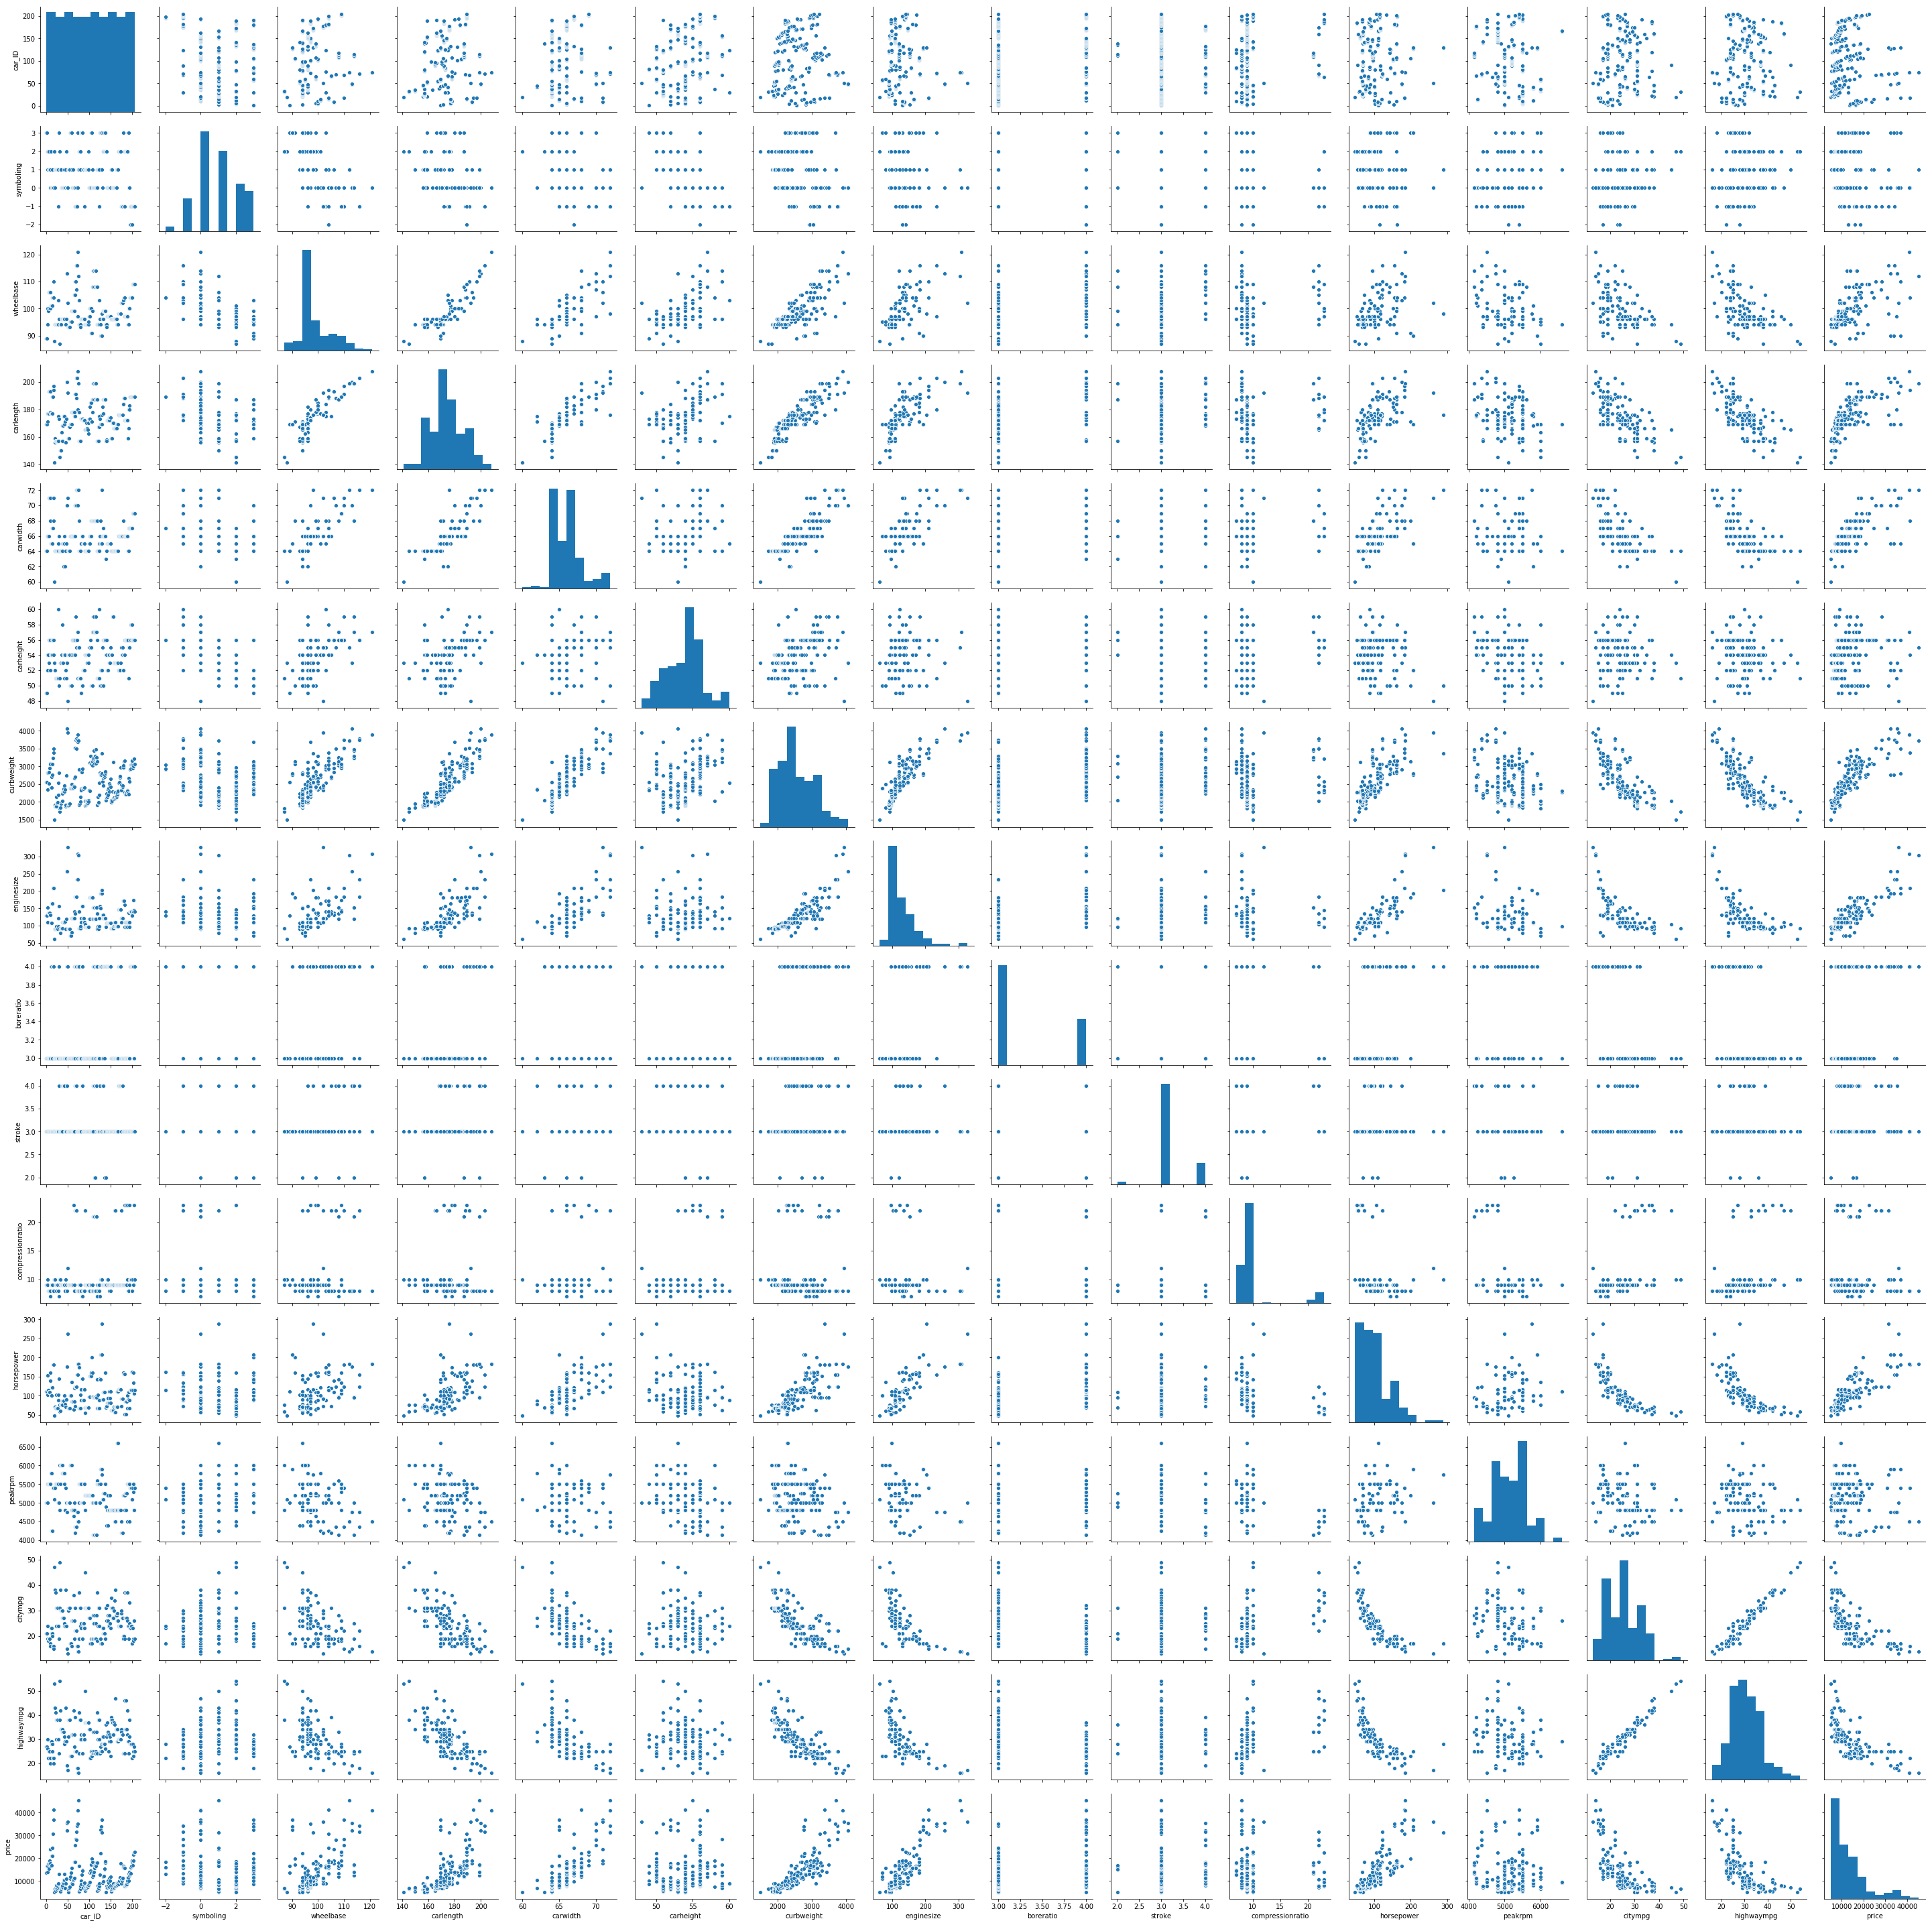

In [11]:
# *** Check the data spread | Start ***
sns.pairplot(df)
plt.show()
# *** Check the data spread | End ***

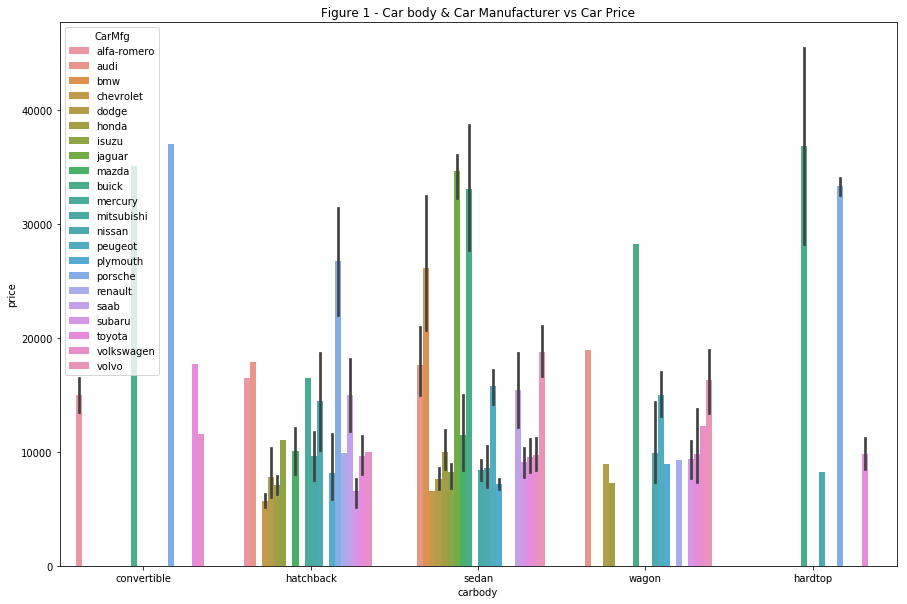

CarMfg
buick          45400
bmw            41315
porsche        37028
jaguar         36000
audi           23875
volvo          22625
nissan         19699
saab           18620
mazda          18344
peugeot        18150
toyota         17669
mercury        16503
alfa-romero    16500
mitsubishi     14869
volkswagen     13845
dodge          12964
honda          12945
plymouth       12764
subaru         11694
isuzu          11048
renault         9895
chevrolet       6575
Name: price, dtype: int64
carbody
hardtop        45400
sedan          41315
convertible    37028
hatchback      31400
wagon          28248
Name: price, dtype: int64


In [12]:
### Check the Carbody of various manufacturer against the prices | Start ####
plt.figure(figsize=(15,10))
ax=sns.barplot(x='carbody', y='price', hue='CarMfg',data=df)
plt.title('Figure 1 - Car body & Car Manufacturer vs Car Price')
plt.show()

### Show the maximum price by manufacturer | Start
print(df.groupby('CarMfg')['price'].max().sort_values(ascending=False))
### Show the maximum price by manufacturer | End

### Show the maximum price by manufacturer | Start
print(df.groupby('carbody')['price'].max().sort_values(ascending=False))
### Show the maximum price by manufacturer | End

### Check the Carbody of various manufacturer against the prices | End ####

<center> By Car body, the <b>Hardtop,Sedan</b> cost the most.<br>
Whereas by Car Manufacturer, <b>Buick</b> followed by <b>BMW</b> is having the costliest cars. </center>

Text(0.5, 1.0, 'Figure 2 -- Checking price of the cars')

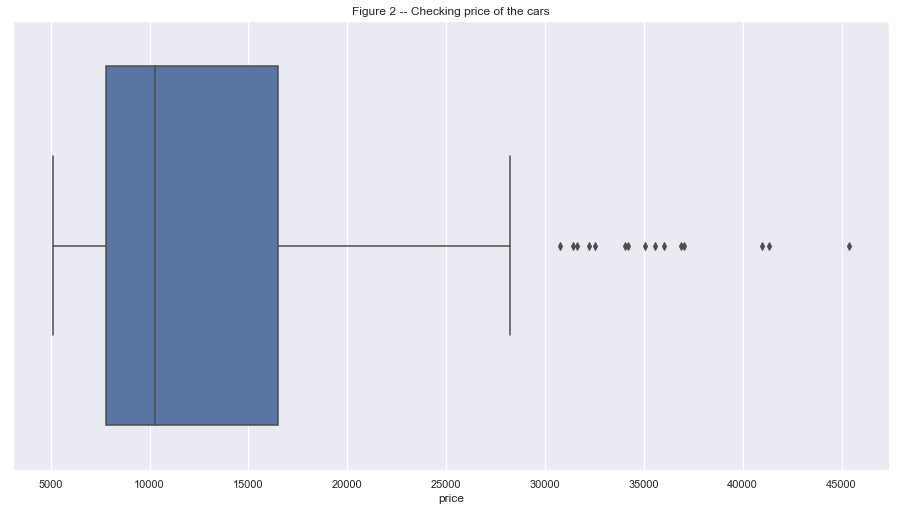

In [13]:
# **** Check the price distribution of cars | Start ****
sns.set(style="darkgrid")
fig,ax=plt.subplots()
fig.set_size_inches(15.7,8.27)
sns.boxplot(df['price'])
plt.title('Figure 2 -- Checking price of the cars')
# **** Check the price distribution of cars | End ****

<center> <b>When we plot the price in boxplot,we can see the clear outliers. Because the Linear Regression is sensitive to outliers, we will remove the same for our analysis </b></center>

In [14]:
df.price.quantile([0.1,0.2,0.4,0.5,0.75,0.90,0.95,0.97,0.99,1.0])

0.10     6657.00
0.20     7385.80
0.40     9036.60
0.50    10295.00
0.75    16503.00
0.90    22563.00
0.95    32472.40
0.97    35490.72
0.99    40802.72
1.00    45400.00
Name: price, dtype: float64

In [15]:
len(df[df.price>32472.402])

11

In [16]:
# Checking and keeping the cars and keeping the cars which lies within 97 percentile range ## 
df_price=df[df.price<=round(df.price.quantile(0.95),2)]

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  194.000000  194.000000  194.000000  194.000000  194.000000  194.000000   
mean   104.654639    0.819588   98.371134  173.262887   65.654639   53.814433   
std     59.864695    1.227250    5.488225   11.784242    1.885121    2.450885   
min      1.000000   -2.000000   87.000000  141.000000   60.000000   49.000000   
25%     53.250000    0.000000   94.000000  166.000000   64.000000   52.000000   
50%    105.500000    1.000000   97.000000  173.000000   65.500000   54.000000   
75%    156.750000    2.000000  101.000000  179.500000   66.000000   56.000000   
max    205.000000    3.000000  116.000000  203.000000   72.000000   60.000000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   194.000000  194.000000  194.000000  194.000000        194.000000   
mean   2503.288660  120.371134    3.288660    3.154639         10.180412   
std     472.006278   30.075146    0.454312

Text(0.5, 1.0, 'Figure 3 -- Checking price of the cars')

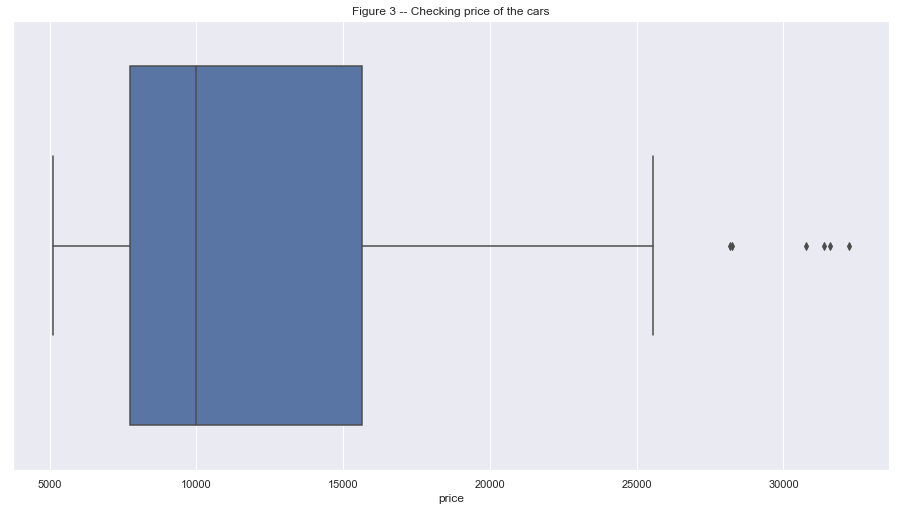

In [17]:
print(df_price.describe())
sns.set(style="darkgrid")
fig,ax=plt.subplots()
fig.set_size_inches(15.7,8.27)
sns.boxplot(df_price['price'])
plt.title('Figure 3 -- Checking price of the cars')

In [18]:
# Drop the CarID column | Start -- This holds no relevance to analysis
df_price.drop('car_ID',inplace=True,axis=1)
# Drop the CarID column | End

In [19]:
#Risk Classification on Symboling column | Start 
df_price['symboling'] = df_price['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})
#Risk Classification on Symboling column | End 

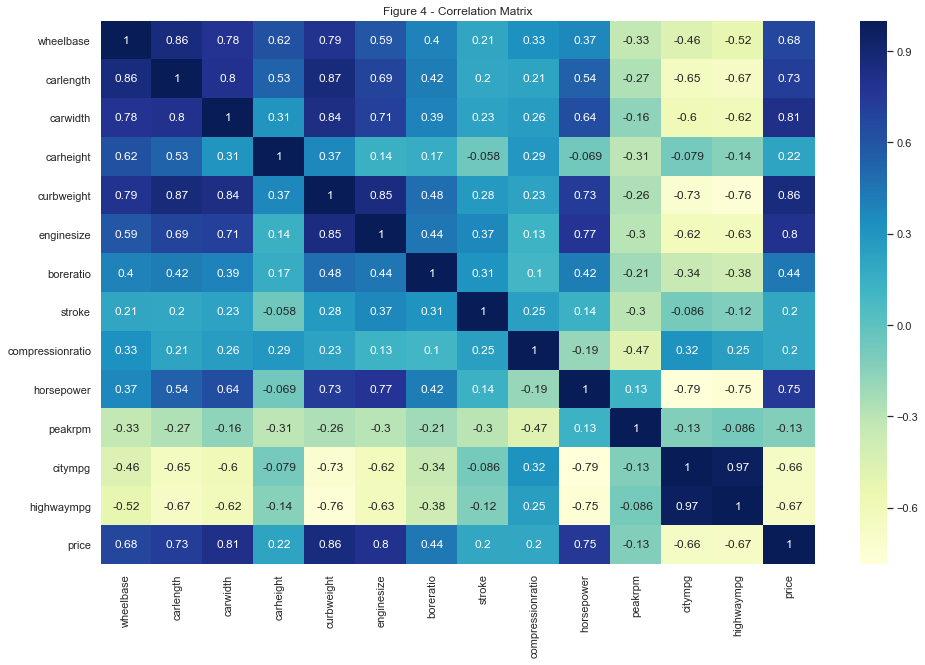

In [20]:
#****** Visualizing the data ******* | Start *****
plt.figure(figsize = (16, 10))
plt.title('Figure 4 - Correlation Matrix')
sns.heatmap(df_price.corr(),annot=True,cmap='YlGnBu')
plt.show()

<b> For the above correlation matrix, we can see there is a high correlation of "Price" with: </b>
<br>
1) wheelbase <br>
2) carlength <br>
3) carwidth <br>
4) curbweight <br>
5) enginesize <br>
6) horsepower <br>
7) boreratio <br>

<b> But there is a negative corelation of Price with:</b>
<br>
1) citympg <br>
2) highwaympg <br>
3) peakrpm

<b> <u>Multicollinearity</u>:</b>
<br>
1) wheelbase --> carlength,carwidth,carheight,curbweight,enginesize <br>
2) carlength --> carwidth,carheight,curbweight,boreratio,horsepower <br>
3) citympg --> highwaympg

    

<center><b>Now we can check the categorical variables</b></center>

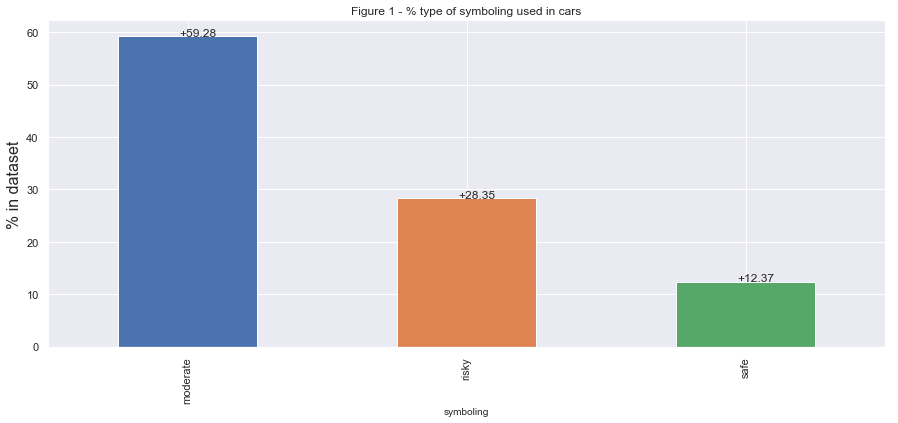

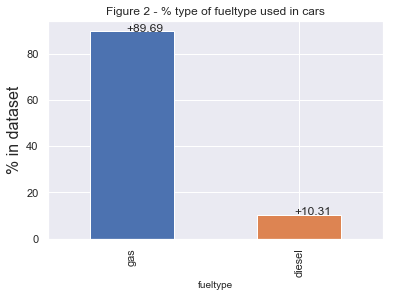

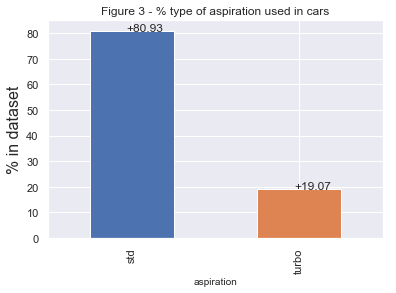

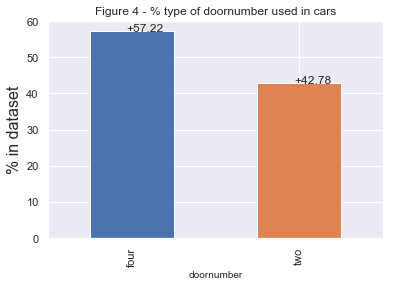

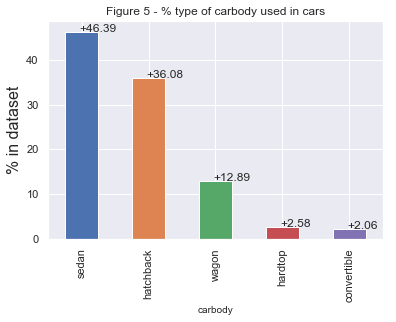

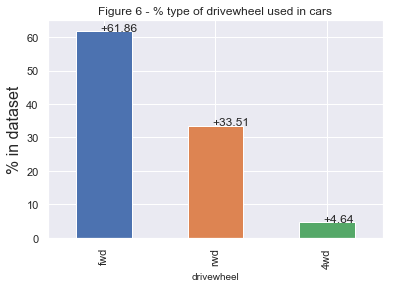

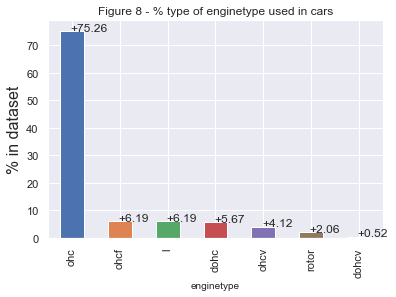

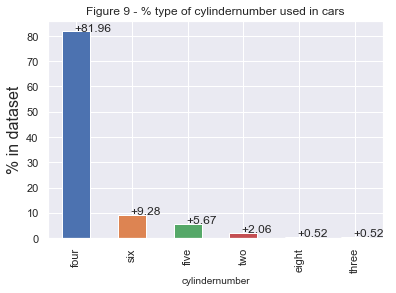

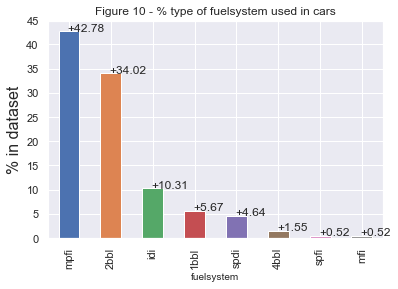

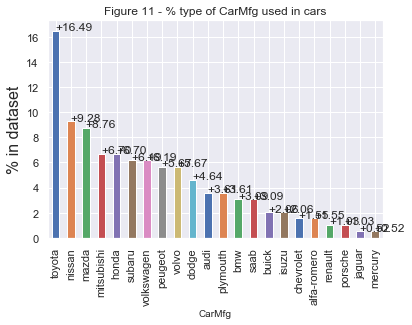

In [21]:
# Check and get the list of the categorical variable | Start
df_cat_cols=list(df_price.columns[df_price.dtypes=='object'])
# Check and get the list of the categorical variable | End

#Plot the categorical variable | Start
plotbar(df_cat_cols,df_price)
#Plot the categorical variable | End

##****** Multiple barcharts are plotted below **********

<center> <b>From the above Geely Motors can visualize what is been mostly preferred in the <br> car industry in US.</b> <br></center>
<b>Some of the key observations:</b><br>
    1. <b>Toyota</b> is the most favoured brand <b>(From Fig-1)</b><br>
    2. <b>MPFI</b> fuel system is preferred over others  <b>(From Fig-10)</b><br>
    3. <b>4 cylinders</b> are preferred in cars (>80%)   <b>(From Fig-9)</b><br>
    4. <b>OHC engines</b> are preferred (>75%)  <b>(From Fig-8)</b><br>
    5. <b>Gas</b> is most preferred fuel type (>89%)  <b> (From Fig-2)</b><br>
    6. <b>Moderate (0,1)</b> is preferred over other symboling <b>(>59%)</b>   (From Fig-1)<br>
    7. Over 46% <b>SEDAN</b> is preferred  <b>(From Fig-5)</b><br>
    8. Standard Aspiration type is preferred (>80%) <b>(From Fig-3)</b>



<center> <b> We can point the categorical variable against the price </b> </center> 

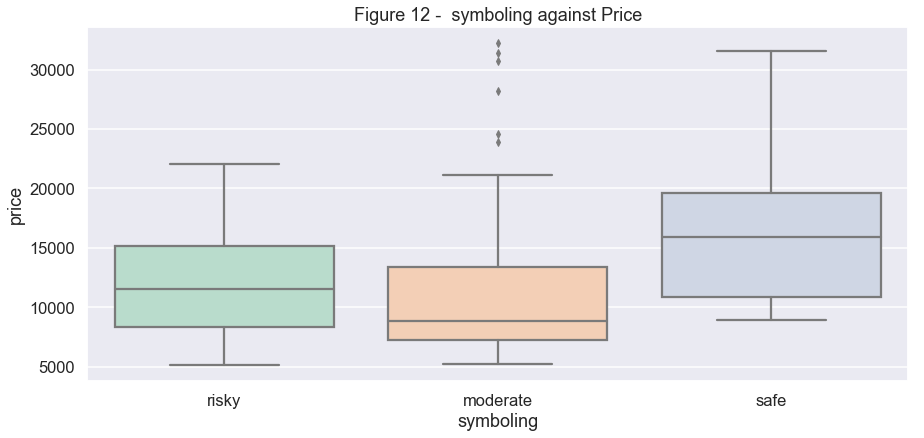

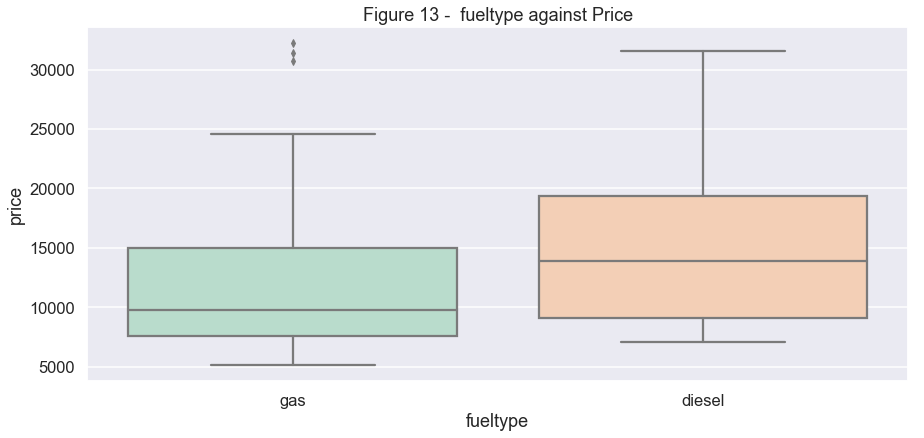

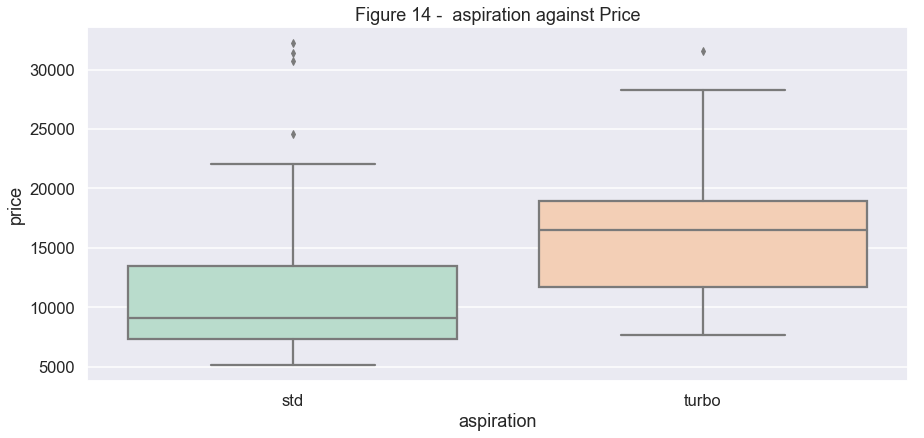

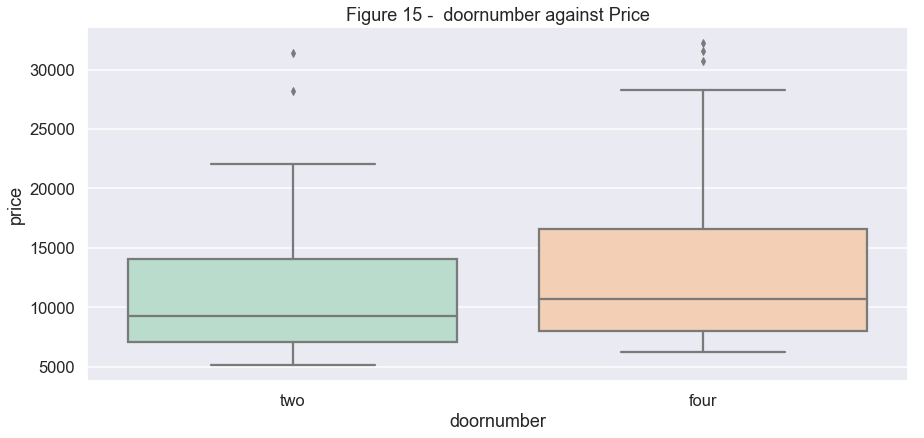

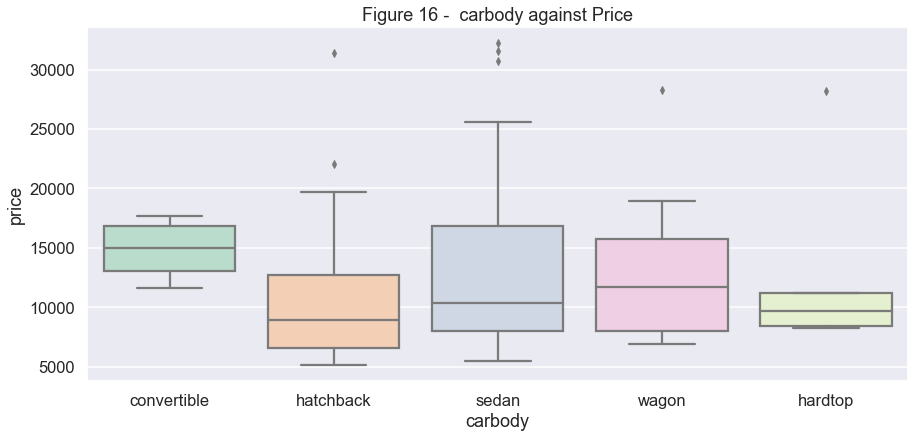

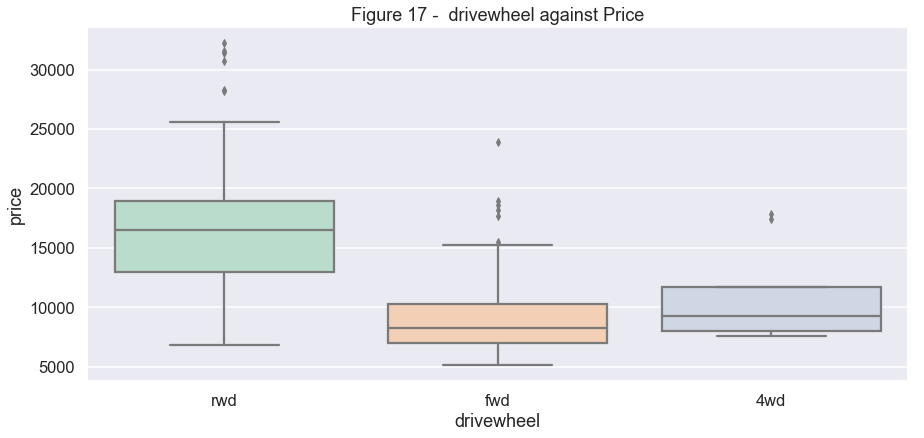

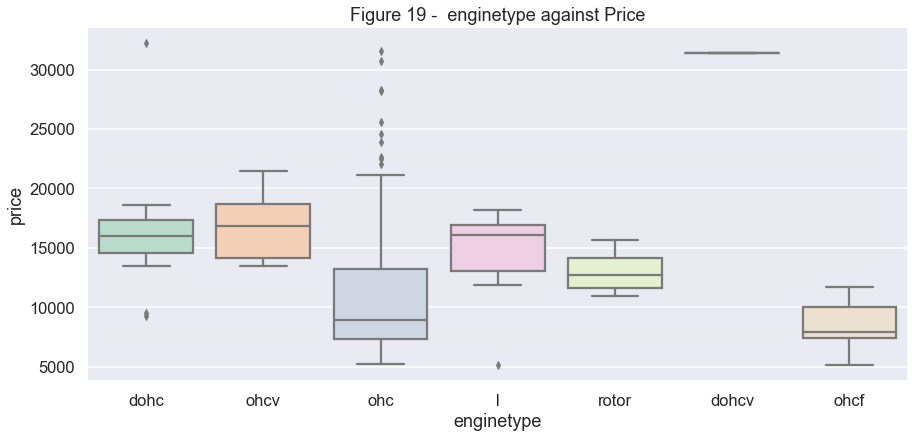

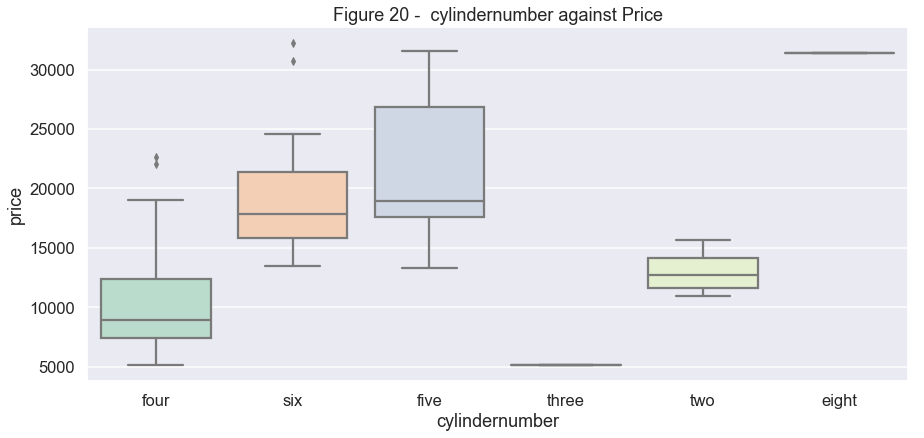

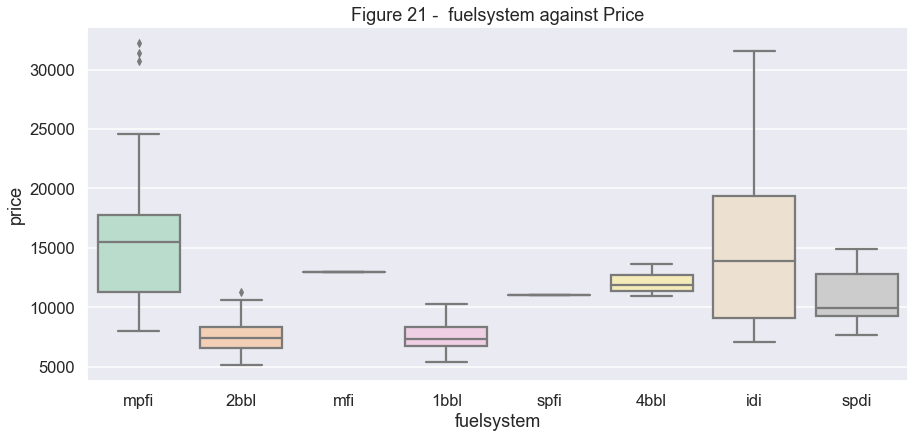

In [22]:
## ** Get the categorical variable and pass into the plotbox function *** | Start
plotbox(df_cat_cols)
## ** Get the categorical variable and pass into the plotbox function *** | End

#### ********* Multiple boxplots are plotted below ************

<b> Observations </b>
1. Not much but Fueltype is having an impact on the price <b>(Figure 13)</b>
2. Carbody also controls price of the car, as covertible is higher than other body types.
3. drivewheel has also a also regulating the price of the car ans rwd ranged much higher <b>(Figure 17)</b>
4. cylindernumber and engine type also contolling the price <b>(Figure 19 & 20)</b>

[]

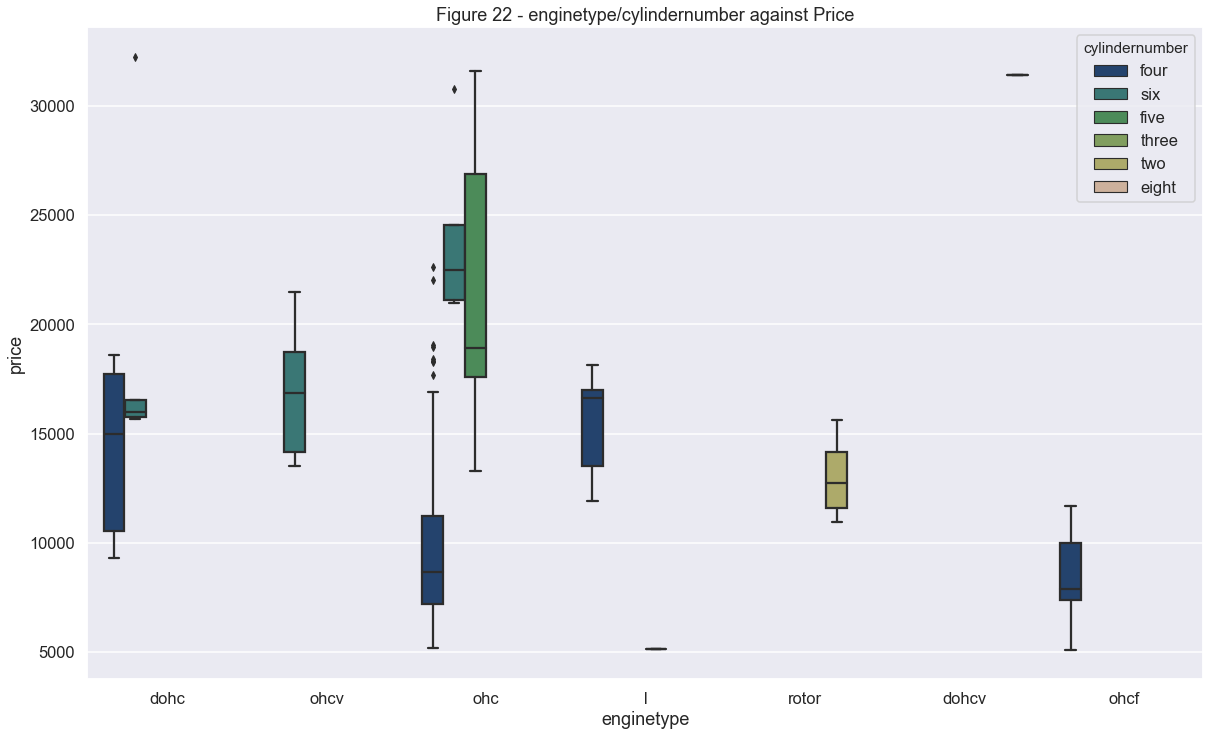

In [23]:
#Bivariate Analysis - to see multiple categorical variable affecting the price | Start
sns.set(style="darkgrid")
sns.set_context('talk')
plt.figure(figsize=(20,12))
sns.boxplot(x='enginetype',y='price',hue='cylindernumber',data=df_price,palette=("gist_earth"))
plt.title('Figure 22 - enginetype/cylindernumber against Price')
plt.plot()

<center><b>Figure 22 - Engine type OHC with 5/6 Cylinders is having high price</b></center>

[]

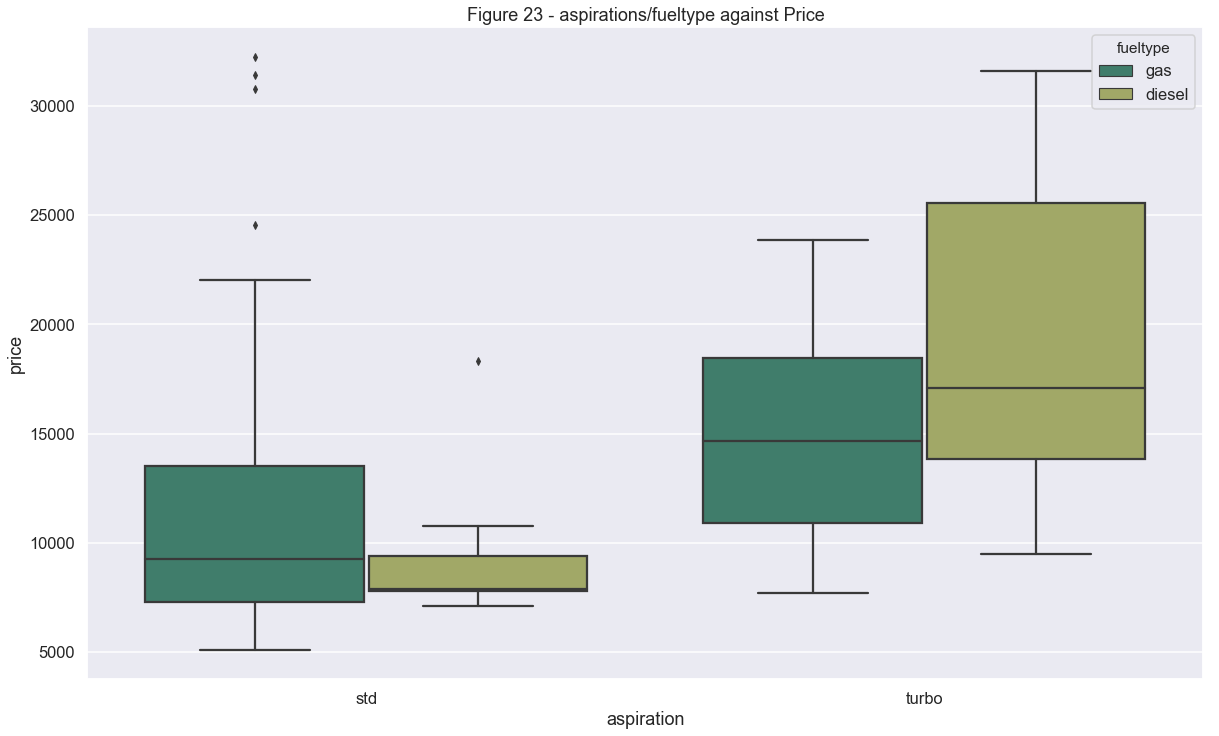

In [24]:
sns.set(style="darkgrid")
sns.set_context('talk')
plt.figure(figsize=(20,12))
sns.boxplot(x='aspiration',y='price',hue='fueltype',data=df_price,palette=("gist_earth"))
plt.title('Figure 23 - aspirations/fueltype against Price')
plt.plot()

<center><b>Figure 23 - Cars with turbo and diesel fuel type is having high price</b></center>

[]

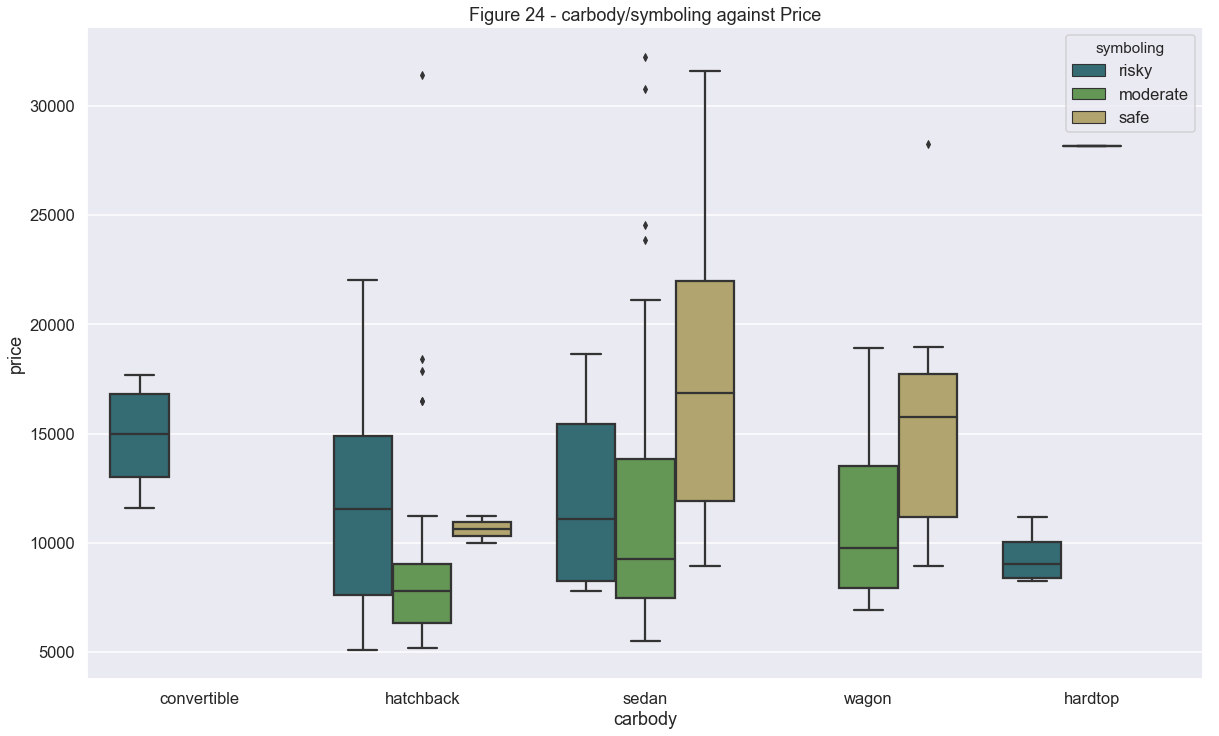

In [25]:
sns.set(style="darkgrid")
sns.set_context('talk')
plt.figure(figsize=(20,12))
sns.boxplot(x='carbody',y='price',hue='symboling',data=df_price,palette=("gist_earth"))
plt.title('Figure 24 - carbody/symboling against Price')
plt.plot()

<center><b>Figure 24 - Sedan Cars with symboling of SAFE is having high price</b></center>

<center><b>Numerical Variables</b></center>

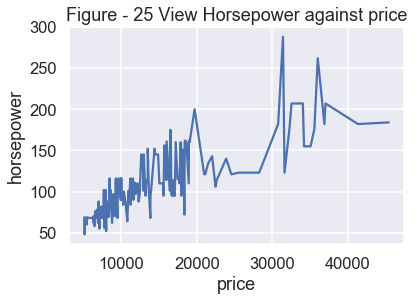

In [26]:
#Plot the horsepower against price | Start
plt.title('Figure - 25 View Horsepower against price')
sns.lineplot(x='price', y='horsepower', data=df)
#Plot the horsepower against price | End

<center>With the increase in horsepower, price increases</center>

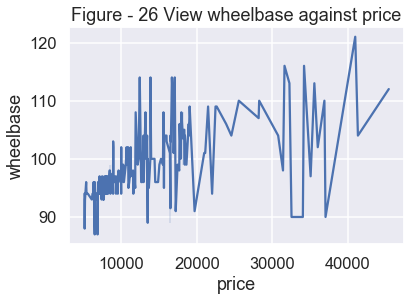

In [27]:
#Plot the horsepower against price | Start
plt.title('Figure - 26 View wheelbase against price')
sns.lineplot(x='price', y='wheelbase', data=df)
#Plot the horsepower against price | End

<center>With the increase in wheelbase, price increases</center>

From the corelation matrix we already know the variables which are corelated to price, plotting the scatter plots for those variables

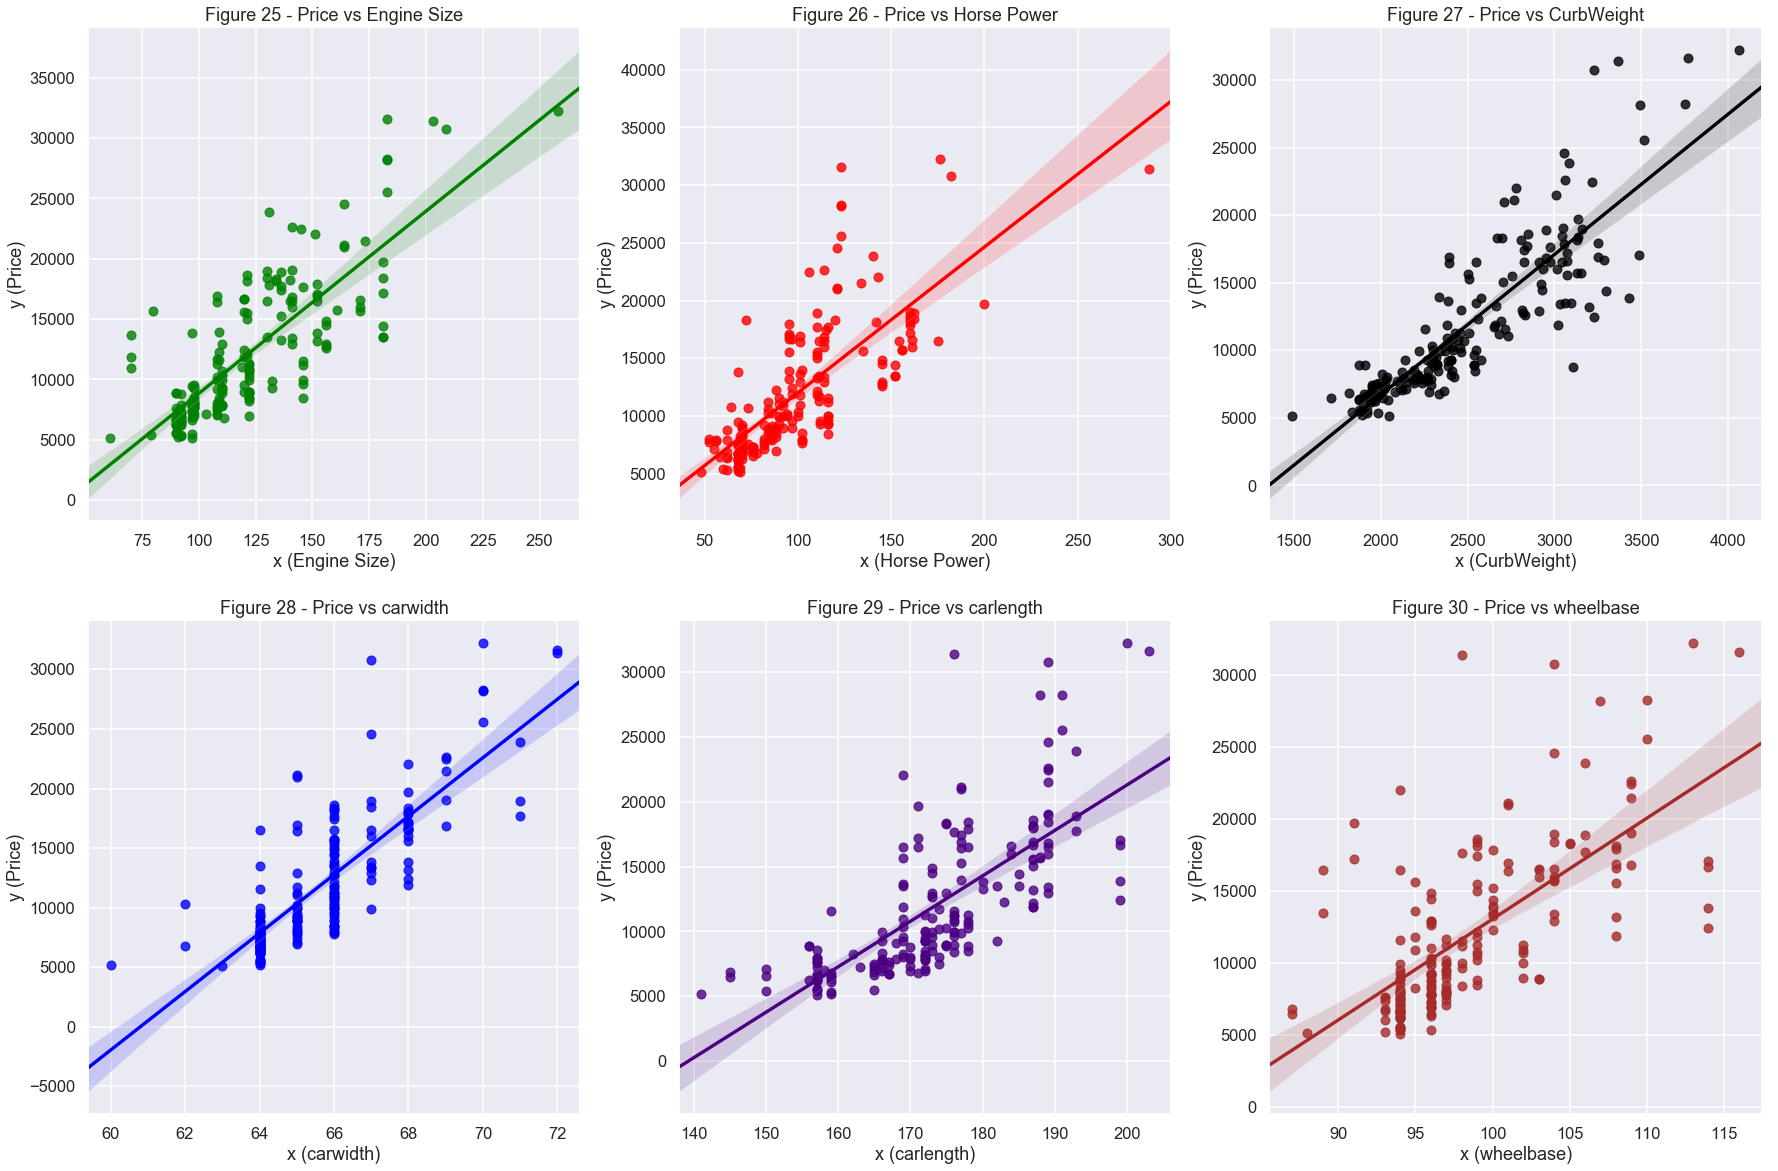

In [28]:
# Scatter plot for the variables , positively correlated to Price |Numerical Data
sns.set(style="darkgrid")
plt.figure(figsize = (30, 20))
sns.set_context('talk')



plt.subplot(2,3,1)
area = np.pi*3
sns.regplot(x=df_price.enginesize, y=df_price.price,color='green')
plt.title('Figure 25 - Price vs Engine Size')
plt.ylabel('y (Price)')
plt.xlabel('x (Engine Size)')


plt.subplot(2,3,2)
area = np.pi*3
sns.regplot(x=df_price.horsepower, y=df_price.price,color='red')
plt.title('Figure 26 - Price vs Horse Power')
plt.ylabel('y (Price)')
plt.xlabel('x (Horse Power)')


plt.subplot(2,3,3)
area = np.pi*3
sns.regplot(x=df_price.curbweight, y=df_price.price,color='black')
plt.title('Figure 27 - Price vs CurbWeight')
plt.ylabel('y (Price)')
plt.xlabel('x (CurbWeight)')


plt.subplot(2,3,4)
area = np.pi*3
sns.regplot(x=df_price.carwidth, y=df_price.price,color='blue')
plt.title('Figure 28 - Price vs carwidth')
plt.ylabel('y (Price)')
plt.xlabel('x (carwidth)')


plt.subplot(2,3,5)
area = np.pi*3
sns.regplot(x=df_price.carlength, y=df_price.price,color='indigo')
plt.title('Figure 29 - Price vs carlength')
plt.ylabel('y (Price)')
plt.xlabel('x (carlength)')



plt.subplot(2,3,6)
area = np.pi*3
sns.regplot(x=df_price.wheelbase, y=df_price.price,color='brown')
plt.title('Figure 30 - Price vs wheelbase')
plt.ylabel('y (Price)')
plt.xlabel('x (wheelbase)')

plt.show()

There are also some variables which are negatively related to the price

<Figure size 2880x1440 with 0 Axes>

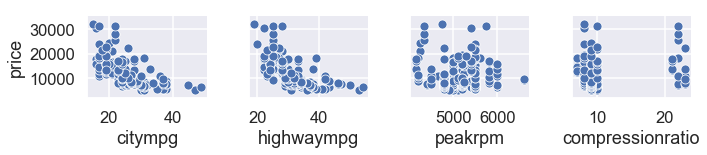

In [29]:
sns.set(style="darkgrid")
plt.figure(figsize = (40,20))
sns.set_context('talk')
sns.pairplot(df_price,x_vars=['citympg','highwaympg','peakrpm','compressionratio'],y_vars=['price'])
plt.show()

1) citympg <br>
2) highwaympg <br>
3) peakrpm <br>
4) compressionratio <br>
All the above are negatively related or not related at all

As we saw the car company is also affecting the price of the car, we segment them also
We will segment the car companies based on the mean company price as <br>
<b> 1. Tier 0 (lower tier) - below 10,000 </b><br>
<b> 2. Tier 1 (mid tier) - 10,000 to 20,000 </b><br>
<b> 3. Tier 2 (high tier) - above 20,000 </b><br>

In [30]:
## Get the average price for each Car Manufacturer | Start
df_price.groupby('CarMfg').price.mean().sort_values(ascending=False)
## Get the average price for each Car Manufacturer | End

CarMfg
jaguar         32250.000000
buick          28394.000000
porsche        26709.000000
bmw            21792.500000
volvo          18063.181818
audi           17859.142857
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.250000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [31]:
## For the mapping of companies based on the average price | Start
carmfg_tier={'jaguar':'Tier2',
            'buick':'Tier2',
            'porsche':'Tier2',
            'bmw':'Tier2',
            'volvo':'Tier1',
            'audi':'Tier1',
            'mercury':'Tier1',
            'alfa-romero':'Tier1',
            'peugeot':'Tier1',
            'saab':'Tier1',
            'mazda':'Tier1',
            'nissan':'Tier1',
            'volkswagen':'Tier1',
            'toyota':'Tier0',
            'renault':'Tier0',
            'mitsubishi':'Tier0',
            'isuzu':'Tier0',
            'subaru':'Tier0',
            'honda':'Tier0',
            'plymouth':'Tier0',
            'dodge':'Tier0',
            'chevrolet':'Tier0'}
#df_price.CarTier=df_price.CarMfg.map(carmfg_tier)
#df_price.drop('CarMfg',axis=1)
carmfg_tier

{'jaguar': 'Tier2',
 'buick': 'Tier2',
 'porsche': 'Tier2',
 'bmw': 'Tier2',
 'volvo': 'Tier1',
 'audi': 'Tier1',
 'mercury': 'Tier1',
 'alfa-romero': 'Tier1',
 'peugeot': 'Tier1',
 'saab': 'Tier1',
 'mazda': 'Tier1',
 'nissan': 'Tier1',
 'volkswagen': 'Tier1',
 'toyota': 'Tier0',
 'renault': 'Tier0',
 'mitsubishi': 'Tier0',
 'isuzu': 'Tier0',
 'subaru': 'Tier0',
 'honda': 'Tier0',
 'plymouth': 'Tier0',
 'dodge': 'Tier0',
 'chevrolet': 'Tier0'}

In [32]:
df_price['CarTier']=df_price.CarMfg.map(carmfg_tier)
## For the mapping of companies based on the average price | End

In [33]:
df_price.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0     risky      gas        std        two  convertible        rwd   
1     risky      gas        std        two  convertible        rwd   
2  moderate      gas        std        two    hatchback        rwd   
3     risky      gas        std       four        sedan        fwd   
4     risky      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  boreratio  stroke  \
0          front         89        169        64  ...          3       3   
1          front         89        169        64  ...          3       3   
2          front         94        171        66  ...          3       3   
3          front        100        177        66  ...          3       3   
4          front         99        177        66  ...          3       3   

  compressionratio horsepower  peakrpm citympg  highwaympg  price  \
0                9        111     5000      21          27  13495   
1                9        111     5000      21          27  16500   
2                9        154     5000      19          26  16500   
3               10        102     5500      24          30  13950   
4                8        115     5500      18          22  17450   

        CarMfg  CarTier  
0  alfa-romero    Tier1  
1  alfa-romero    Tier1  
2  alfa-romero    Tier1  
3         audi    Tier1  
4         audi    Tier1  

[5 rows x 26 columns]

In [34]:
df_price.groupby('CarTier').price.mean()

CarTier
Tier0     8893.242105
Tier1    13231.837209
Tier2    25384.538462
Name: price, dtype: float64

In [35]:
## Earlier, from the scatter plot and the heatmap, we noticed there is a high correlation 
##between carlength, wheelbase, car width, car weight and city/highway mpg's. 
## Lets create new variables from these to try reducing the multicolinearlity. This would be 
# helpful to remove the correlated values

# Creating new variable LWratio
df_price['LWratio'] = df_price.carlength/df_price.carwidth
# Creating new variable carWHratio
df_price['WHratio'] = df_price.carwidth/df_price.carheight
# Creating new variable PWratio
df_price['PWratio'] = df_price.horsepower/df_price.curbweight
# Creating new variable HCmpgratio
df_price['HCmpgratio'] = df_price.highwaympg/df_price.citympg
## droping the orignal variables
df_price.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)
#df_price.drop(['carlength','carwidth','carheight','highwaympg','citympg','curbweight'],axis=1,inplace=True)

In [36]:
df_price_cat=df_price
df_price.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0     risky      gas        std        two  convertible        rwd   
1     risky      gas        std        two  convertible        rwd   
2  moderate      gas        std        two    hatchback        rwd   
3     risky      gas        std       four        sedan        fwd   
4     risky      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  curbweight enginetype  ... compressionratio  \
0          front         89        2548       dohc  ...                9   
1          front         89        2548       dohc  ...                9   
2          front         94        2823       ohcv  ...                9   
3          front        100        2337        ohc  ...               10   
4          front         99        2824        ohc  ...                8   

   horsepower peakrpm  price       CarMfg  CarTier   LWratio   WHratio  \
0         111    5000  13495  alfa-romero    Tier1  2.640625  1.306122   
1         111    5000  16500  alfa-romero    Tier1  2.640625  1.306122   
2         154    5000  16500  alfa-romero    Tier1  2.590909  1.269231   
3         102    5500  13950         audi    Tier1  2.681818  1.222222   
4         115    5500  17450         audi    Tier1  2.681818  1.222222   

    PWratio HCmpgratio  
0  0.043564   1.285714  
1  0.043564   1.285714  
2  0.054552   1.368421  
3  0.043646   1.250000  
4  0.040722   1.222222  

[5 rows x 25 columns]

In [37]:
## ** Convert the categorical variables to 1 or 0 ***** | Start 
df_price_cat['aspiration'] = df_price_cat['aspiration'].map({'std': 1, 'turbo': 0})
df_price_cat['fueltype'] = df_price_cat['fueltype'].map({'gas': 1, 'diesel': 0})
df_price_cat['enginelocation'] = df_price_cat['enginelocation'].map({'front': 1, 'rear': 0})
df_price_cat['doornumber'] = df_price_cat['doornumber'].map({'two': 1, 'four': 0})
## ** Convert the categorical variables to 1 or 0 ***** | End 

In [38]:
## **** Get all the numerical variables | start
numericalvar=list(df_price_cat.columns[df_price_cat.dtypes!='object'])
## **** Get all the numerical variables | end
print(len(numericalvar))

17


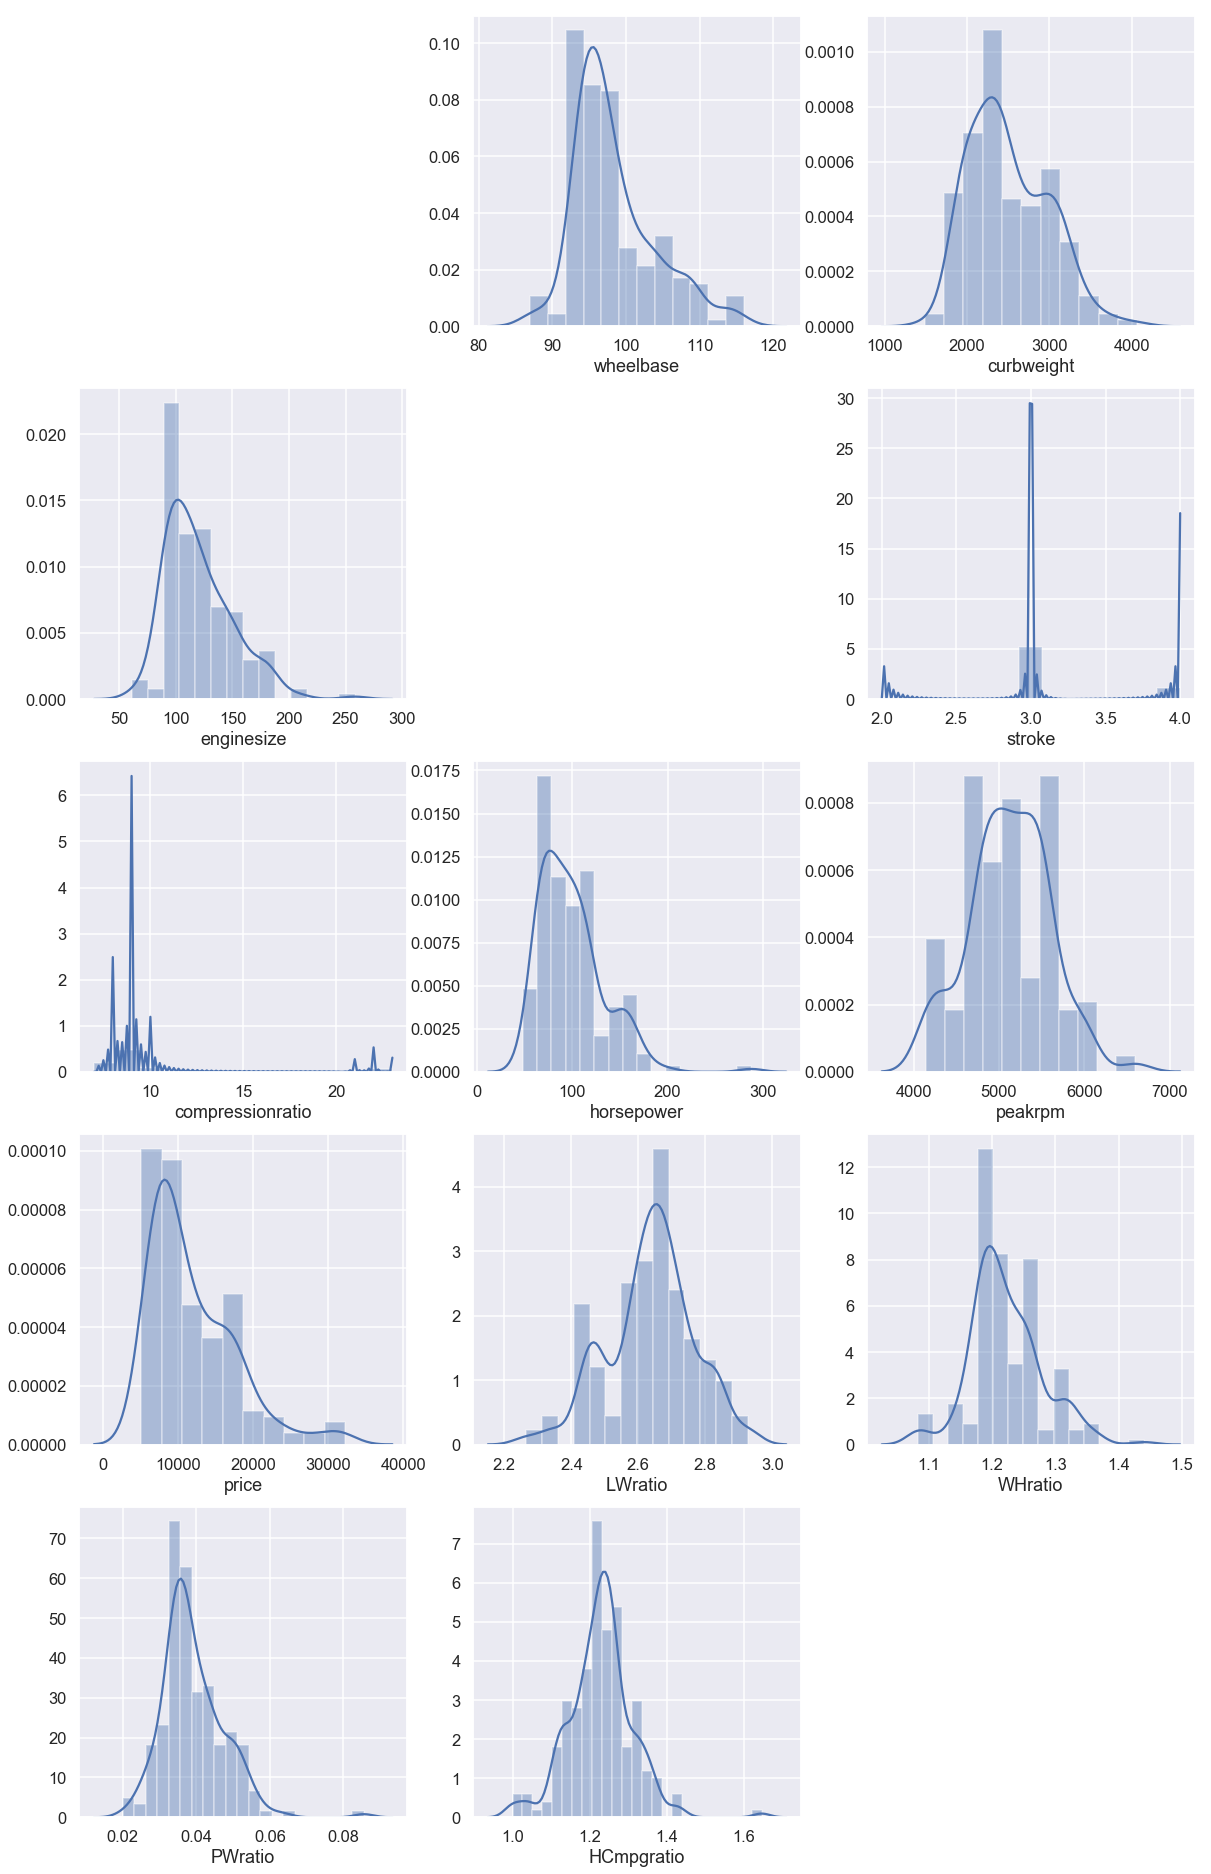

In [39]:
gethistogram(df_price_cat,numericalvar)

In [40]:
qntls=['fueltype',
 'aspiration',
 'doornumber',
 'enginelocation',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'price',
 'LWratio',
 'WHratio',
 'PWratio',
 'HCmpgratio']
print(df_price_cat[qntls].quantile([0.1,0.25,0.5,0.75,0.90,0.95,0.96,1.0]))

#qntls_95=['citympg','highwaympg','horsepower','curbweight','carheight','carwidth','carlength','wheelbase']
#qntls_90=['peakrpm','compressionratio','enginesize']


      fueltype  aspiration  doornumber  enginelocation  wheelbase  curbweight  \
0.10       0.3         0.0         0.0             1.0      94.00     1944.30   
0.25       1.0         1.0         0.0             1.0      94.00     2131.00   
0.50       1.0         1.0         0.0             1.0      97.00     2403.00   
0.75       1.0         1.0         1.0             1.0     101.00     2846.25   
0.90       1.0         1.0         1.0             1.0     107.70     3136.60   
0.95       1.0         1.0         1.0             1.0     109.00     3263.55   
0.96       1.0         1.0         1.0             1.0     109.28     3315.60   
1.00       1.0         1.0         1.0             1.0     116.00     4066.00   

      enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0.10        91.0        3.0     3.0               8.0       68.00   4430.0   
0.25        97.0        3.0     3.0               9.0       70.00   4800.0   
0.50       110.0        3.0     3.0 

In [41]:

### --- Keeping till 95% quartile and clipping the outliers --- ### | Start

df_price_cat['horsepower'][np.abs(df_price_cat['horsepower'] > 160.00)]= 160.00
df_price_cat['enginesize'][np.abs(df_price_cat['enginesize'] > 181.00)]= 181.00
df_price_cat['compressionratio'][np.abs(df_price_cat['compressionratio'] > 22.00)]= 22.00

### --- Keeping till 95% quartile --- ### | End

# **** Price clipped till less than 3 SD ***** | Start
df_price_cat= df_price_cat[np.abs(df_price_cat.price-df_price_cat.price.mean()) <= (3*df_price_cat.price.std())]
# **** Price clipped till less than 3 SD ***** | End

17


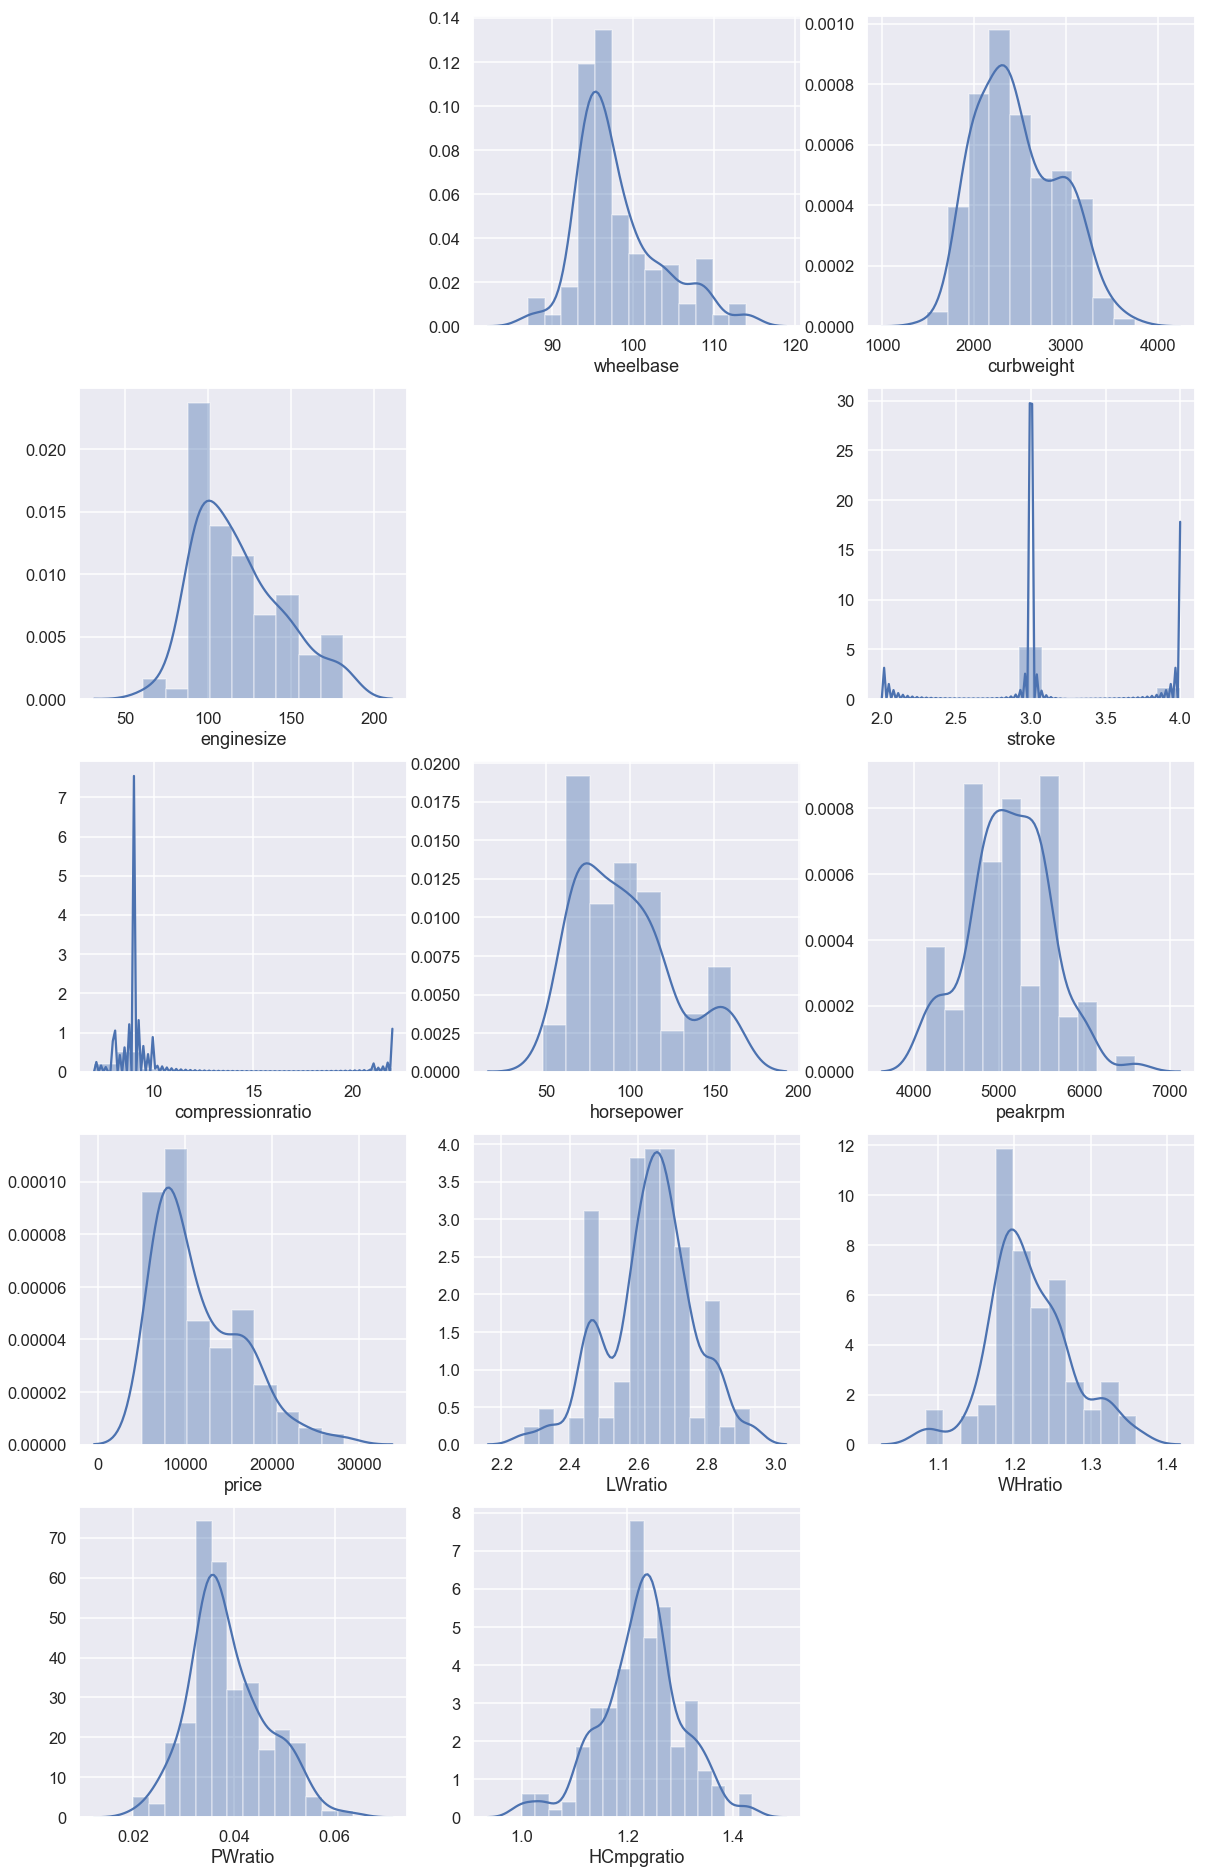

In [42]:
len(df_price_cat)
## **** Get all the numerical variables | start
numericalvar1=list(df_price_cat.columns[df_price_cat.dtypes!='object'])
## **** Get all the numerical variables | end
print(len(numericalvar1))

gethistogram(df_price_cat,numericalvar1)

In [43]:
df_price_cat.head()

symboling  fueltype  aspiration  doornumber      carbody drivewheel  \
0     risky         1           1           1  convertible        rwd   
1     risky         1           1           1  convertible        rwd   
2  moderate         1           1           1    hatchback        rwd   
3     risky         1           1           0        sedan        fwd   
4     risky         1           1           0        sedan        4wd   

   enginelocation  wheelbase  curbweight enginetype  ... compressionratio  \
0               1         89        2548       dohc  ...                9   
1               1         89        2548       dohc  ...                9   
2               1         94        2823       ohcv  ...                9   
3               1        100        2337        ohc  ...               10   
4               1         99        2824        ohc  ...                8   

   horsepower peakrpm  price       CarMfg  CarTier   LWratio   WHratio  \
0         111    5000  13495  alfa-romero    Tier1  2.640625  1.306122   
1         111    5000  16500  alfa-romero    Tier1  2.640625  1.306122   
2         154    5000  16500  alfa-romero    Tier1  2.590909  1.269231   
3         102    5500  13950         audi    Tier1  2.681818  1.222222   
4         115    5500  17450         audi    Tier1  2.681818  1.222222   

    PWratio HCmpgratio  
0  0.043564   1.285714  
1  0.043564   1.285714  
2  0.054552   1.368421  
3  0.043646   1.250000  
4  0.040722   1.222222  

[5 rows x 25 columns]

In [44]:
# We can drop the CarMfg as it has no. significance in analysis 
df_price_cat.drop('CarMfg',axis=1,inplace=True)

In [45]:
## Form the dummy variables | Start

df_dummy=pd.get_dummies(df_price_cat)
print(len(df_dummy.columns))

## Form the dummy variables | End

50


In [46]:
## *** Checking the dummy columns *****
df_dummy.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'LWratio', 'WHratio', 'PWratio',
       'HCmpgratio', 'symboling_moderate', 'symboling_risky', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CarTier_Tier0', 'CarTier_Tier1', 'CarTier_Tier2'],
      dtype='object')

In [47]:
## ***** Keep the n-1 Dummy variables ****** |start

df_dummy.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'CarTier_Tier0'],axis=1,inplace=True)

## ***** Keep the n-1 Dummy variables ****** |end

<center> <h2> Model Building Start </h2> </center>

In [48]:
# ******* Split the Dataset into train and test dataset ******** | Start

df_train, df_test = train_test_split(df_dummy, train_size = 0.7, test_size = 0.3, random_state = 100)

# ******* Split the Dataset into train and test dataset ******** | End

In [49]:
df_dummy.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'LWratio', 'WHratio', 'PWratio',
       'HCmpgratio', 'symboling_moderate', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'CarTier_Tier1', 'CarTier_Tier2'],
      dtype='object')

In [50]:
# Feature Scaling | Start 
scale=MinMaxScaler()

## *** Scale all those numeric columns except the dummy variables and 0,1 type columns *** ## | Start
var = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','LWratio','WHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']
df_train[var]=scale.fit_transform(df_train[var])
df_train.head()
## *** Scale all those numeric columns except the dummy variables and 0,1 type columns  *** ## | End


# Feature Scaling | End 

fueltype  aspiration  doornumber  enginelocation  wheelbase  curbweight  \
180         1           1           0               1   0.629630    0.696122   
76          1           1           1               1   0.259259    0.100638   
85          1           1           0               1   0.333333    0.320079   
100         1           1           0               1   0.370370    0.289151   
92          1           1           0               1   0.259259    0.110457   

     enginesize  boreratio  stroke  compressionratio  ...  cylindernumber_two  \
180    0.909910        0.0     0.5          0.133333  ...                   0   
76     0.198198        0.0     0.5          0.133333  ...                   0   
85     0.468468        0.0     0.5          0.066667  ...                   0   
100    0.450450        0.0     0.5          0.066667  ...                   0   
92     0.243243        0.0     0.5          0.133333  ...                   0   

     fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
180                0                0               0               0   
76                 1                0               0               0   
85                 1                0               0               0   
100                1                0               0               0   
92                 1                0               0               0   

     fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  CarTier_Tier1  \
180                1                0                0              0   
76                 0                0                0              0   
85                 0                0                0              0   
100                0                0                0              1   
92                 0                0                0              1   

     CarTier_Tier2  
180              0  
76               0  
85               0  
100              0  
92               0  

[5 rows x 43 columns]

In [51]:
df_train.describe()

fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  133.000000  133.000000  133.000000           133.0  133.000000   
mean     0.887218    0.789474    0.413534             1.0    0.421331   
std      0.317522    0.409224    0.494329             0.0    0.195589   
min      0.000000    0.000000    0.000000             1.0    0.000000   
25%      1.000000    1.000000    0.000000             1.0    0.259259   
50%      1.000000    1.000000    0.000000             1.0    0.370370   
75%      1.000000    1.000000    1.000000             1.0    0.481481   
max      1.000000    1.000000    1.000000             1.0    1.000000   

       curbweight  enginesize   boreratio      stroke  compressionratio  ...  \
count  133.000000  133.000000  133.000000  133.000000        133.000000  ...   
mean     0.387626    0.438867    0.263158    0.563910          0.218045  ...   
std      0.223007    0.246756    0.442012    0.198608          0.278419  ...   
min      0.000000    0.000000    0.000000    0.000000          0.000000  ...   
25%      0.209622    0.243243    0.000000    0.500000          0.133333  ...   
50%      0.338733    0.360360    0.000000    0.500000          0.133333  ...   
75%      0.549828    0.594595    1.000000    0.500000          0.133333  ...   
max      1.000000    1.000000    1.000000    1.000000          1.000000  ...   

       cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
count          133.000000       133.000000       133.000000      133.000000   
mean             0.030075         0.353383         0.022556        0.112782   
std              0.171440         0.479828         0.149046        0.317522   
min              0.000000         0.000000         0.000000        0.000000   
25%              0.000000         0.000000         0.000000        0.000000   
50%              0.000000         0.000000         0.000000        0.000000   
75%              0.000000         1.000000         0.000000        0.000000   
max              1.000000         1.000000         1.000000        1.000000   

       fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
count           133.0       133.000000       133.000000       133.000000   
mean              0.0         0.398496         0.052632         0.007519   
std               0.0         0.491440         0.224141         0.086711   
min               0.0         0.000000         0.000000         0.000000   
25%               0.0         0.000000         0.000000         0.000000   
50%               0.0         0.000000         0.000000         0.000000   
75%               0.0         1.000000         0.000000         0.000000   
max               0.0         1.000000         1.000000         1.000000   

       CarTier_Tier1  CarTier_Tier2  
count     133.000000     133.000000  
mean        0.473684       0.052632  
std         0.501195       0.224141  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       0.000000  
max         1.000000       1.000000  

[8 rows x 43 columns]

In [52]:
# Get the X & Y for model building | Start
y_train = df_train.pop('price')
X_train = df_train  

In [53]:
y_train

180    0.457069
76     0.011716
85     0.080891
100    0.191569
92     0.074838
204    0.756896
133    0.304885
23     0.122741
12     0.685344
19     0.050886
188    0.210852
80     0.209295
51     0.042240
148    0.125162
182    0.114872
189    0.280026
192    0.377302
149    0.284306
57     0.368655
42     0.225984
108    0.349416
40     0.223822
6      0.544401
60     0.146001
28     0.164419
24     0.048033
123    0.164419
9      0.550843
26     0.107696
38     0.171941
         ...   
144    0.177907
174    0.241245
147    0.219628
119    0.122741
170    0.262905
145    0.265499
97     0.124557
104    0.522309
152    0.059230
159    0.115435
64     0.264894
66     0.571812
118    0.019628
158    0.120190
203    0.750195
37     0.120061
14     0.840770
77     0.046304
59     0.161133
109    0.316559
195    0.358712
105    0.630393
153    0.077821
191    0.353524
90     0.085646
98     0.135365
114    0.516948
78     0.067056
27     0.148725
8      0.810938
Name: price, Length: 133

In [54]:
## ***** Get the columns using RFE - We start by using 15 columns | Start ******
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
cols = X_train.columns[rfe.support_]
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True  True  True False False  True  True False
 False  True False False False False  True False False False False False
 False False  True False False False  True False False False  True  True
 False False False False  True  True]
[ 1  1 16 27  1  1  1 22 15  1  1 17 13  1 21 23 19  7  1 26 24 14 18  8
  5  2  1  4  6 25  1 20 10 11  1  1 28 12  3  9  1  1]


In [55]:
cols

## ***** Get the columns using RFE - We start by using 15 columns | End ******

Index(['fueltype', 'aspiration', 'wheelbase', 'curbweight', 'enginesize',
       'compressionratio', 'horsepower', 'WHratio', 'carbody_convertible',
       'enginetype_ohcf', 'cylindernumber_four', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'CarTier_Tier1', 'CarTier_Tier2'],
      dtype='object')

In [56]:
## **** Function for the model ***** | Start       

def modelFit(X_train):
    X_train=sm.add_constant(X_train)
    lm=sm.OLS(y_train,X_train).fit()
    print(lm.summary())
    
## **** Function for the model ***** | End 

## **** Function for getting the VIF ***** | Start 
def getVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
## **** Function for getting the VIF ***** | End

<h3><center>***** First Run *****</center></h3>

In [57]:
X_train_r = X_train[cols]
modelFit(X_train_r)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     104.8
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.40e-59
Time:                        20:51:44   Log-Likelihood:                 182.98
No. Observations:                 133   AIC:                            -336.0
Df Residuals:                     118   BIC:                            -292.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2162    

<center><h3>Observations 1</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.926 and 0.917 respectively, </b>but if we see the p values, <b>enginetype_ohcf and enginesize</b> have p values > 0.05, in that case we will drop them one by one and check how our model performs</center>

<h3><center>***** Second Run *****</center></h3>
<br> Here we will drop "enginetype_ohcf" and run our model

In [58]:
## *** Drop the enginetype_ohcf from the dataframe **** | Start

X_train_r.drop('enginetype_ohcf',axis=1,inplace=True)

## *** Drop the enginetype_ohcf from the dataframe **** | End

In [59]:
modelFit(X_train_r)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     113.8
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.32e-60
Time:                        20:51:44   Log-Likelihood:                 182.95
No. Observations:                 133   AIC:                            -337.9
Df Residuals:                     119   BIC:                            -297.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2154    

<center><h3>Observations 2</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.926 and 0.917 respectively,after dropping enginetype_ohcf, which is unchanged. We can also see F-Statistics increased from the first run</b> but again p values, <b> enginesize</b> have p value > 0.05, in that case we will drop it one by one and check how our model performs.
    
<br><br>
<h3>Plot a heatmap to see the correlation of the features -- > after 2nd Run </h3>

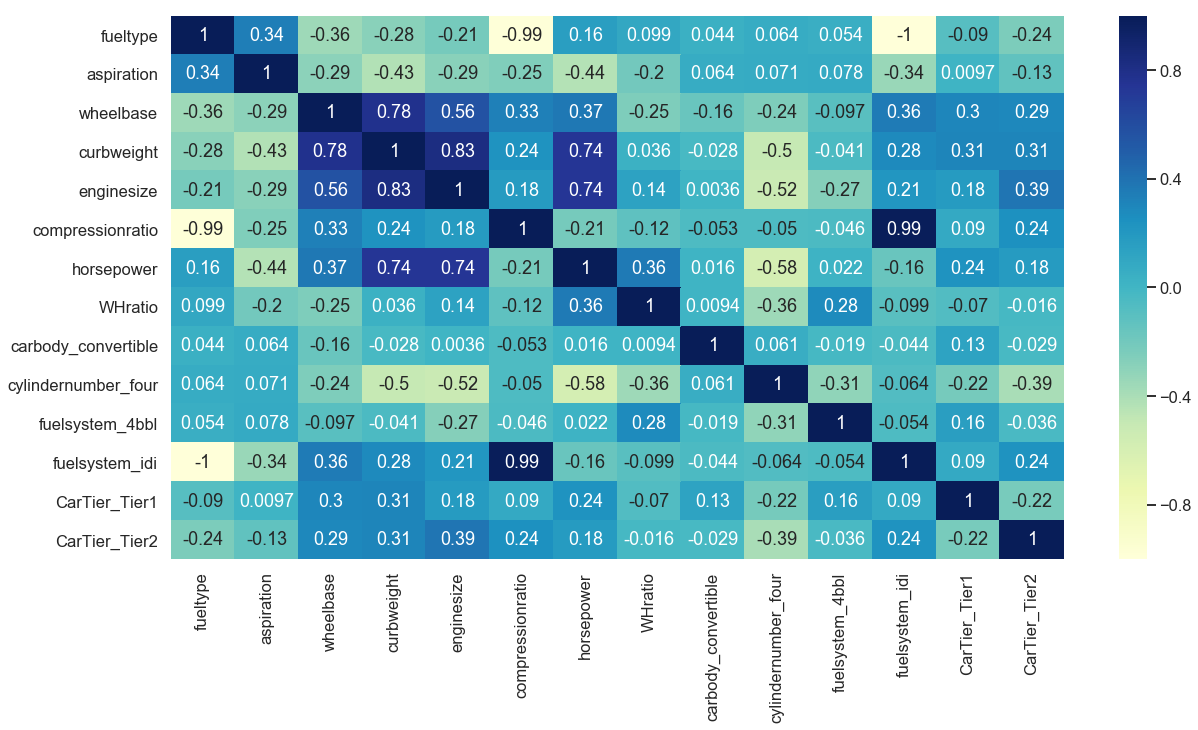

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_r.corr(),annot=True,cmap='YlGnBu')

<h3><center>***** Third Run *****</center></h3>
<br> Here we will drop "enginesize" and run our model

In [61]:
## *** Drop the enginesize from the dataframe **** | Start

X_train_r.drop('enginesize',axis=1,inplace=True)

## *** Drop the enginesize from the dataframe **** | End

In [62]:
modelFit(X_train_r)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     121.0
Date:                Wed, 08 May 2019   Prob (F-statistic):           5.20e-61
Time:                        20:51:45   Log-Likelihood:                 181.27
No. Observations:                 133   AIC:                            -336.5
Df Residuals:                     120   BIC:                            -299.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2186    

<center><h3>Observations 3</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.0.924 and 0.916 respectively,after dropping enginesize, the adjusted R2 value decresed a bit from previous run. We can also see AIC decreased but BIC increased from the second run</b> but again p values of <b> fuelsystem_4bbl</b>  > 0.05, in that case we will drop it and check how our model performs. We now can see <b>the F-Statistics also icreased from 113 to 121 from previous run</b></center>
    
<br><br>
<h3>Plot a heatmap to see the correlation of the features -- > after 3rd Run </h3>

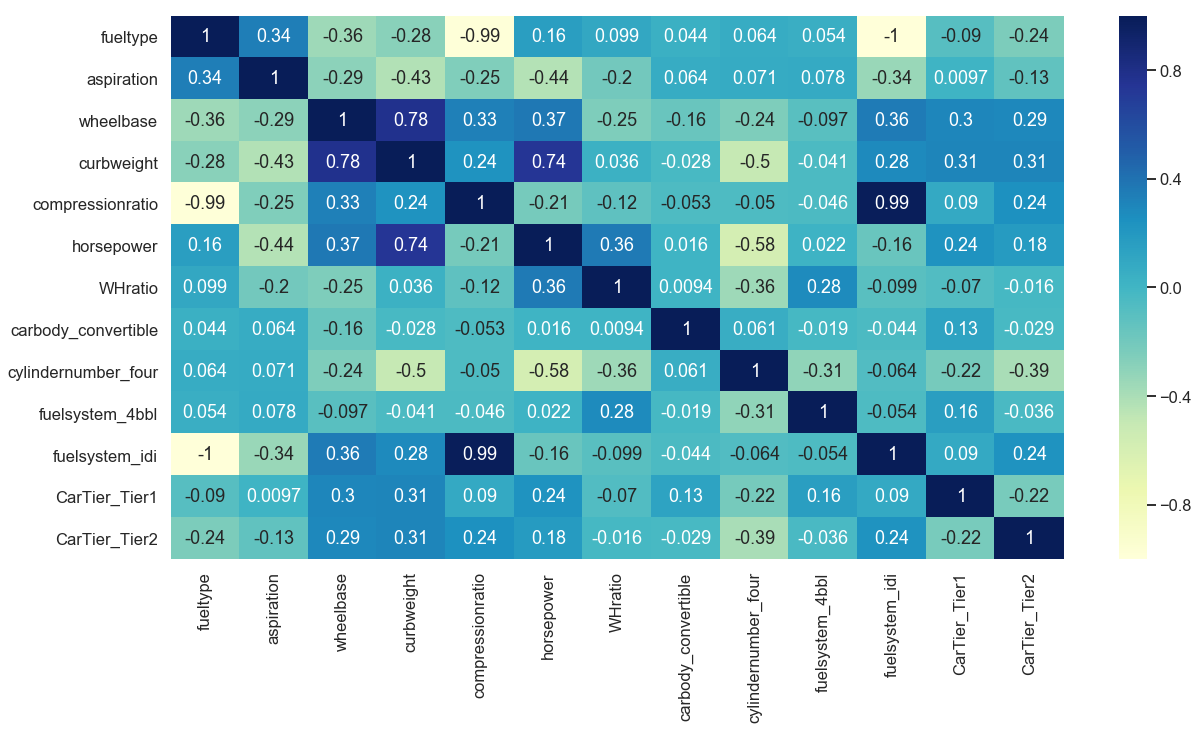

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_r.corr(),annot=True,cmap='YlGnBu')

<h3><center>***** Fourth Run *****</center></h3>
<br> Here we will drop "fuelsystem_4bbl" and run our model

In [64]:
## *** Drop the fuelsystem_4bbl from the dataframe **** | Start

X_train_r.drop('fuelsystem_4bbl',axis=1,inplace=True)

## *** Drop the fuelsystem_4bbl from the dataframe **** | End

In [65]:
modelFit(X_train_r)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.84e-61
Time:                        20:51:46   Log-Likelihood:                 179.69
No. Observations:                 133   AIC:                            -335.4
Df Residuals:                     121   BIC:                            -300.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2210    

<center><h3>Observations 4</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.922 and 0.915 respectively,after dropping fuelsystem_4bbl, the adjusted R2 value reduced a bit from previous run. We can also see AIC decreased and BIC increased from the third run</b>. We now can see all the p values are in the range of 0.05. The F-statistics also icreased from the previous run, which icreased from 121 to 129</center>
    
<br><br>
<h3>Plot a heatmap to see the correlation of the features -- > after 4th Run </h3>

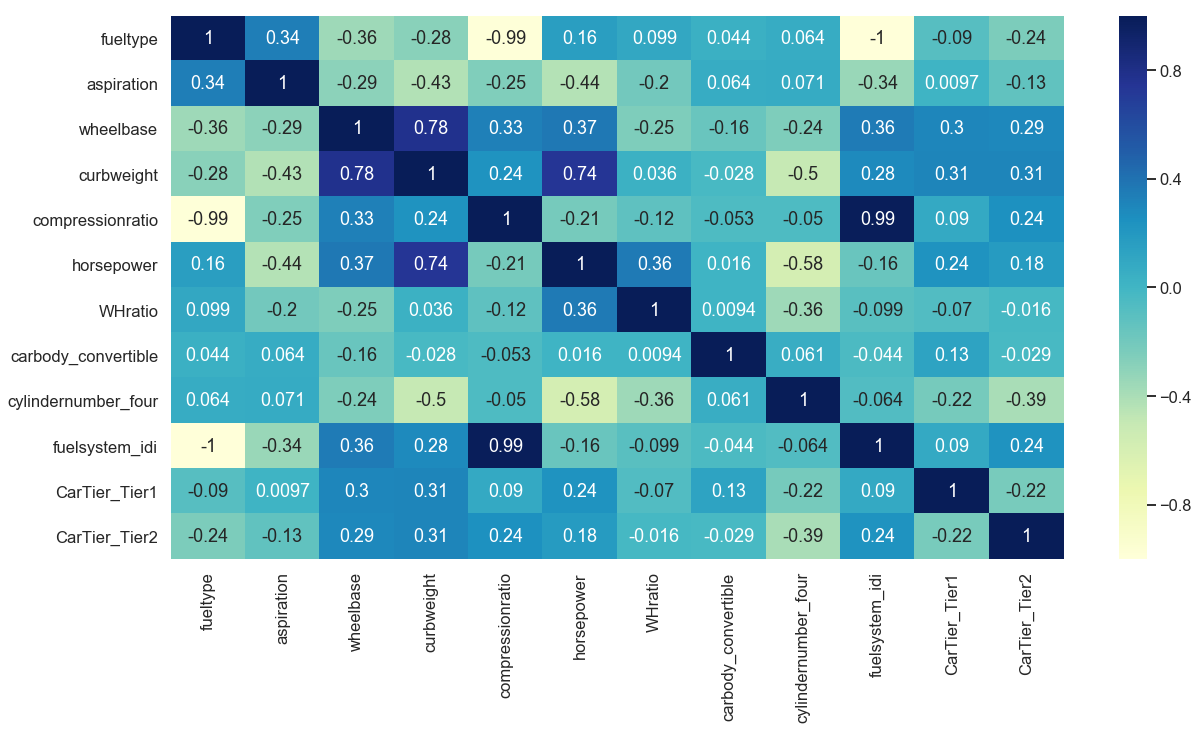

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_r.corr(),annot=True,cmap='YlGnBu')

In [67]:
# Get the VIF Scores for the features | Start 
getVIF(X_train_r)                                ## ***** For 4th Run *******
# Get the VIF Scores for the features | End

               Features    VIF
9        fuelsystem_idi  95.77
0              fueltype  71.78
4      compressionratio  65.70
3            curbweight   8.50
5            horsepower   6.84
2             wheelbase   4.03
1            aspiration   2.58
8   cylindernumber_four   2.47
11        CarTier_Tier2   1.71
6               WHratio   1.66
10        CarTier_Tier1   1.55
7   carbody_convertible   1.16


<center><h3>Observations 4.1</h3><br><b>We already knew that the R2 and adjusted R2 square values are as follows: 0.922 and 0.915 respectively,after dropping fuelsystem_4bbl.</b> We now can see all the p values are in the range of 0.05. But when we see the VIF scores, we find that <b>fuelsystem_idi</b> is having a very high VIF score and thus we have to remove the feature, and execute our model again</center>


<h3><center>***** Fifth Run *****</center></h3>
<br> Here we will drop "fuelsystem_idi" and run our model

In [68]:
## *** Drop the fuelsystem_idi from the dataframe **** | Start

X_train_r.drop('fuelsystem_idi',axis=1,inplace=True)

## *** Drop the fuelsystem_idi from the dataframe **** | End

In [69]:
modelFit(X_train_r)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.84e-61
Time:                        20:51:47   Log-Likelihood:                 179.69
No. Observations:                 133   AIC:                            -335.4
Df Residuals:                     121   BIC:                            -300.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6190    

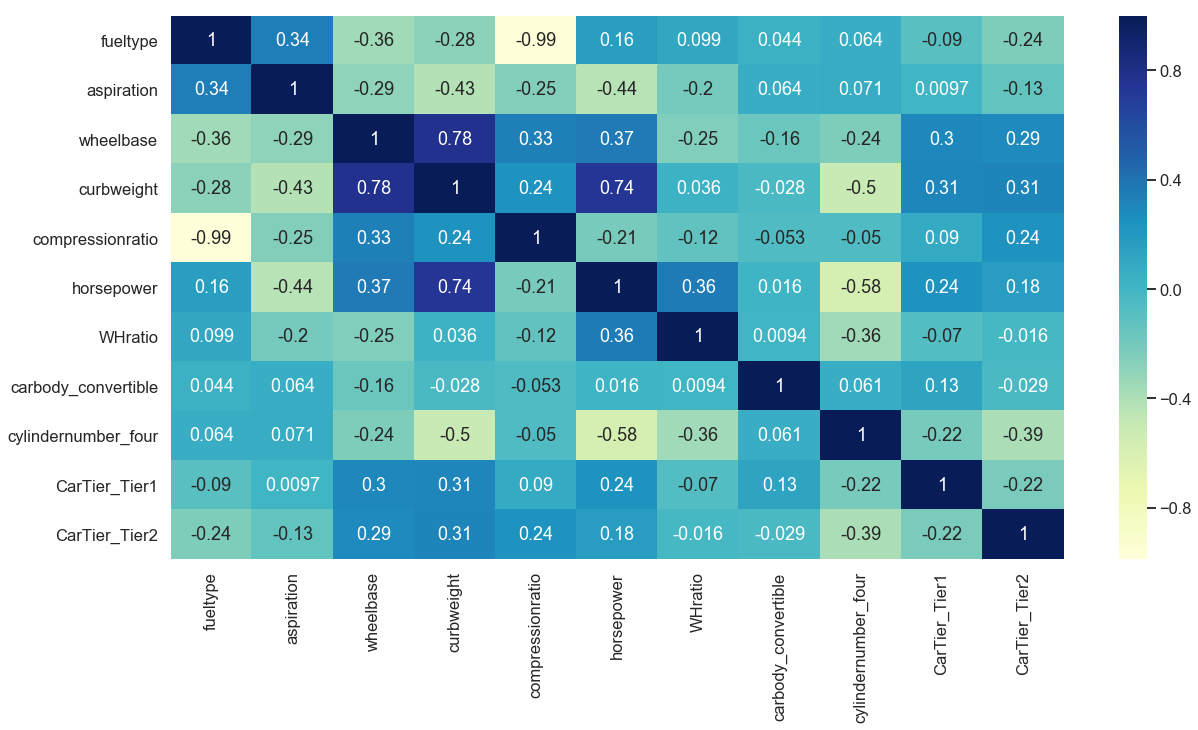

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_r.corr(),annot=True,cmap='YlGnBu')

In [71]:
getVIF(X_train_r)

               Features    VIF
0              fueltype  58.91
3            curbweight  34.05
5            horsepower  23.34
2             wheelbase  22.63
8   cylindernumber_four  12.55
6               WHratio  11.66
1            aspiration  10.86
4      compressionratio   9.43
9         CarTier_Tier1   2.93
10        CarTier_Tier2   1.78
7   carbody_convertible   1.16


<center><h3>Observations 5</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.922 and 0.915 respectively,after dropping fuelsystem_idi, which is unchanged from previous run. We can also see AIC and BIC also remained unchanged from the fourth run</b>. <br>
The F-Statistics also remained unchanged from 4th run also.<br>
We now can see all the feature p-values are in range of 0.05. 
    <br> When we check the VIF scores again we find that <b>fueltype</b> has the highest VIF scores, among all, so we drop and measure again</center>

<h3><center>***** Sixth Run *****</center></h3>
<br> Here we will drop "fueltype" and run our model

In [72]:
## *** Drop the fueltype from the dataframe **** | Start

X_train_r.drop('fueltype',axis=1,inplace=True)

## *** Drop the fueltype from the dataframe **** | End

In [73]:
modelFit(X_train_r)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     127.3
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.36e-59
Time:                        20:51:48   Log-Likelihood:                 172.22
No. Observations:                 133   AIC:                            -322.4
Df Residuals:                     122   BIC:                            -290.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0196    

In [74]:
getVIF(X_train_r)

              Features    VIF
2           curbweight  33.70
1            wheelbase  21.53
4           horsepower  19.26
5              WHratio   8.32
7  cylindernumber_four   5.29
0           aspiration   4.50
3     compressionratio   3.22
8        CarTier_Tier1   2.91
9        CarTier_Tier2   1.68
6  carbody_convertible   1.15


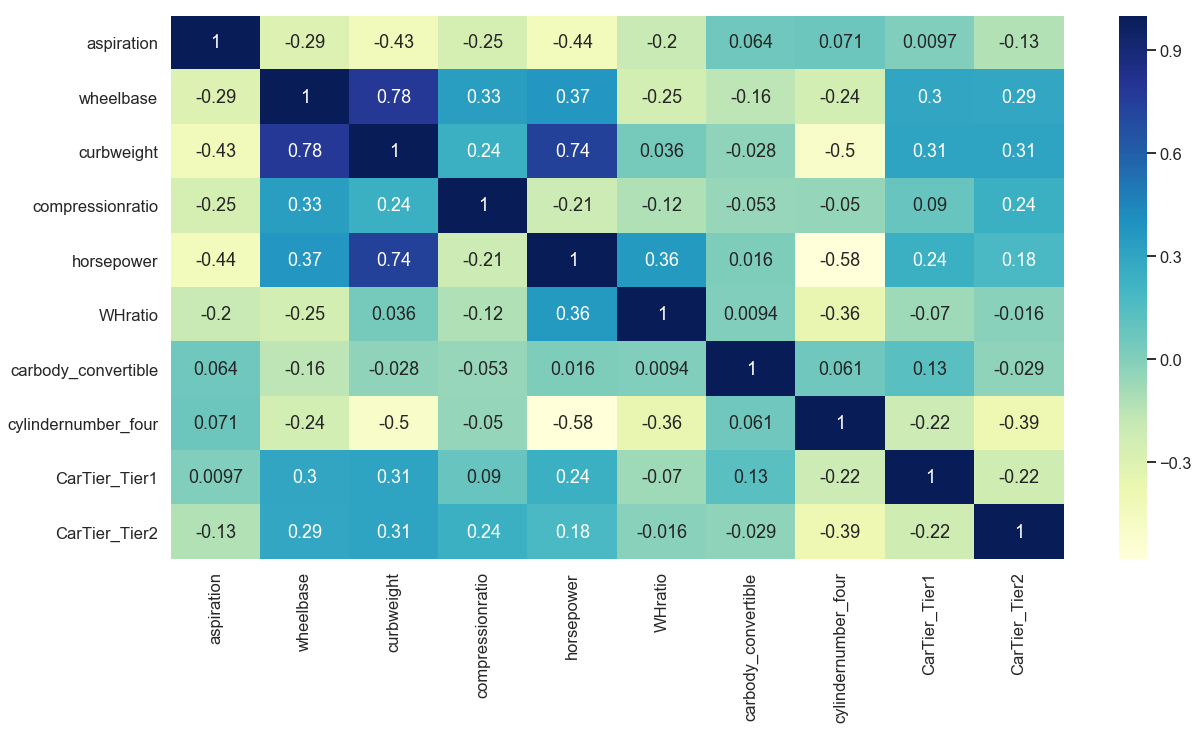

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_r.corr(),annot=True,cmap='YlGnBu')

<center><h3>Observations 6</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.913 and 0.905 respectively,after dropping fueltype, which is a bit less previous run. We can also see AIC and BIC also improved from the fourth run</b>. <br>
The F-Statistics also remained unchanged from 5th run also.<br>
    We now can see <b>compressionratio and carbody_convertible has p-values greater than 0.05</b>
    <br> When we check the VIF scores again we find that <b>WHratio</b> has a higher VIF and the change in R2 and adj R2 becomes least amongst the higher VIF scored features, also the <b>F-statistics increases and AIC, BIC scores also improves</b>, so we drop and measure again</center>

<h3><center>***** Seventh Run *****</center></h3>
<br> Here we will drop "WHratio" and run our model

In [76]:
## *** Drop the WHratio from the dataframe **** | Start

X_train_r_t=X_train_r.drop('WHratio',axis=1)

## *** Drop the WHratio from the dataframe **** | End

In [77]:
modelFit(X_train_r_t)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     133.6
Date:                Wed, 08 May 2019   Prob (F-statistic):           4.07e-59
Time:                        20:51:49   Log-Likelihood:                 168.29
No. Observations:                 133   AIC:                            -316.6
Df Residuals:                     123   BIC:                            -287.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0621    

In [78]:
## ** Get the VIF Scores for the features | Start **
getVIF(X_train_r_t)
## ** Get the VIF Scores for the features | End **

              Features    VIF
2           curbweight  32.34
1            wheelbase  21.40
4           horsepower  11.67
6  cylindernumber_four   4.96
0           aspiration   3.67
7        CarTier_Tier1   2.86
3     compressionratio   2.67
8        CarTier_Tier2   1.67
5  carbody_convertible   1.15


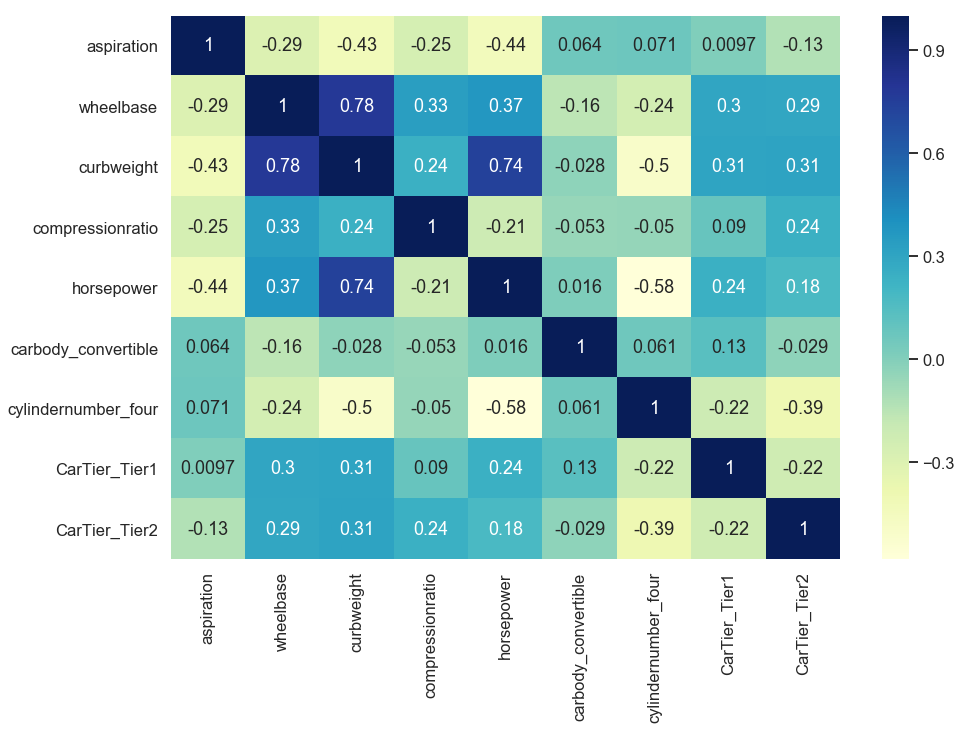

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_r_t.corr(),annot=True,cmap='YlGnBu')

<center><h3>Observations 7</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.907 and 0.900 respectively,after dropping WHratio, which is a bit less previous run. We can also see AIC and BIC also improved from the sixth run</b>. <br>
The F-Statistics also increased to 133 from 6th run also.<br>
    We now can see <b>compressionratio and carbody_convertible has p-values greater than 0.05</b>
</center>

<h3><center>***** Eighth Run *****</center></h3>
<br> Here we will drop "compressionratio" and run our model

In [80]:
## *** Drop the compressionratio from the dataframe **** | Start

X_train_r_w=X_train_r_t.drop('compressionratio',axis=1)

## *** Drop the compressionratio from the dataframe **** | End

In [81]:
modelFit(X_train_r_w)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.17e-59
Time:                        20:51:50   Log-Likelihood:                 166.89
No. Observations:                 133   AIC:                            -315.8
Df Residuals:                     124   BIC:                            -289.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0990    

In [82]:
## ** Get the the VIF scores for the features ** | Start
getVIF(X_train_r_w)
## ** Get the the VIF scores for the features ** | End

              Features    VIF
2           curbweight  27.57
1            wheelbase  21.40
3           horsepower   8.57
5  cylindernumber_four   4.61
0           aspiration   3.61
6        CarTier_Tier1   2.76
7        CarTier_Tier2   1.57
4  carbody_convertible   1.15


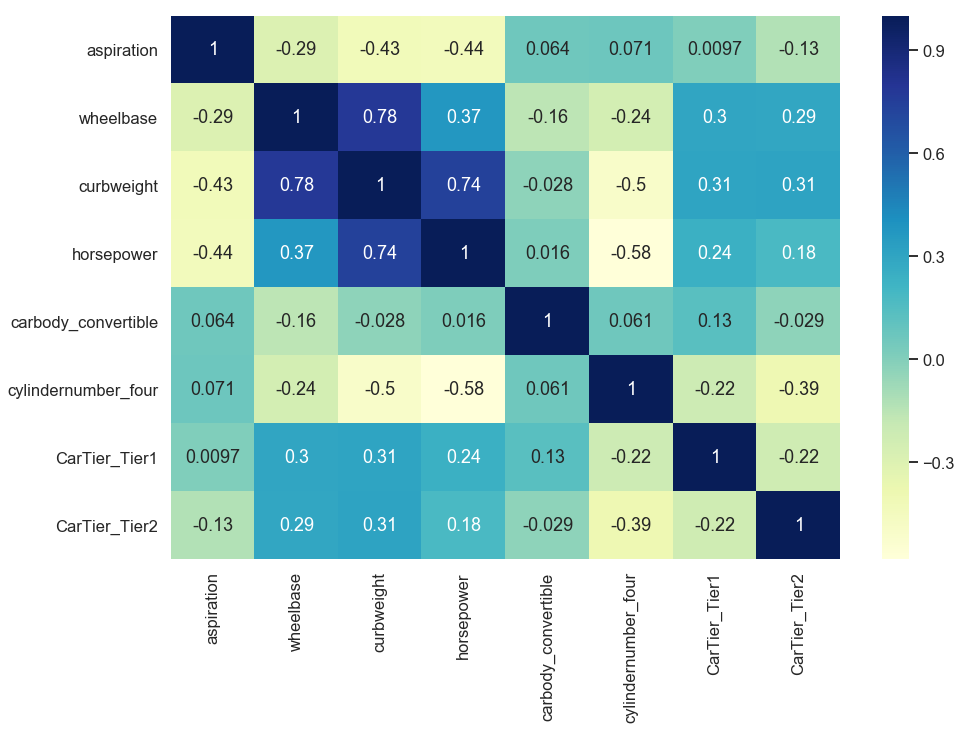

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_r_w.corr(),annot=True,cmap='YlGnBu')

<center><h3>Observations 8</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.905 and 0.899 respectively,after dropping compressionratio, which is a bit less previous run. We can also see AIC has improved and BIC increased from the seventh run</b>. <br>
The F-Statistics also increased to 148 from 7th run.<br>
    <b>Though the p-values are in range of 0.05, but from the heat map it is clear that curbweight is multicollinear with wheelbase and horsepower, also the VIF score of curbweight is greater than wheelbase and horsepower so we drop curbweight</b>
</center>

<h3><center>***** 9th Run *****</center></h3>
<br> Here we will drop "curbweight" and run our model

In [84]:
## *** Drop the curbweight from the dataframe **** | Start

X_train_r_z=X_train_r_w.drop('curbweight',axis=1)

## *** Drop the curbweight from the dataframe **** | End

In [85]:
#modelFit(X_train_r_z)

X_train_r_z=sm.add_constant(X_train_r_z)
lm=sm.OLS(y_train,X_train_r_z).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     148.6
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.93e-57
Time:                        20:51:50   Log-Likelihood:                 158.65
No. Observations:                 133   AIC:                            -301.3
Df Residuals:                     125   BIC:                            -278.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1066    

In [86]:
getVIF(X_train_r_z)

              Features    VIF
0                const  40.82
3           horsepower   2.16
5  cylindernumber_four   2.04
7        CarTier_Tier2   1.57
2            wheelbase   1.53
6        CarTier_Tier1   1.46
1           aspiration   1.40
4  carbody_convertible   1.10


<center><h3>Observations 9</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.893,0.887 respectively,which are very close and the values are also quite good. We can also see both AIC and BIC scores improved from previous run</b>. <br>
The F-Statistics remained unchanged from previous run<br>
The p-values of the variables are very less now and in range of 0.05, also the VIF scores of the features are also very less, so we will proceed with these variables as our final predictors</center>

<h2><center>Residual Analysis of the trained data</center></h2>

We check if the error terms are normally distributed (which is one of the major assumptions of linear regression), we can plot histogram of the error terms and see how it looks

In [87]:
y_train_r_z = lm.predict(X_train_r_z)

In [88]:
# Importing the required libraries for plotting.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Index')

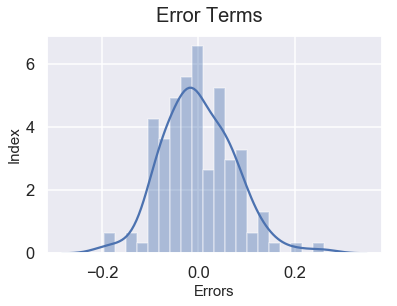

In [89]:
# Plot the histogram of the error 
fig = plt.figure()
sns.distplot((y_train - y_train_r_z), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 15)
plt.ylabel('Index', fontsize = 15)

<center>From the above plot, it seems that the errors are almost normally distributed, as it is not exactly centered at 0 and there is a small variance at the tail of the graph.But we can still assume that the errors are Normally Distributed along  </center>

<center><H2>Time to test our model</H2></center>

In [90]:
## ** Scale the test features ** | Start
var = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','LWratio','WHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']
df_test[var]=scale.transform(df_test[var])
df_test.head()
## ** Scale the test features ** | End

fueltype  aspiration  doornumber  enginelocation  wheelbase  curbweight  \
176         1           1           0               1   0.555556    0.344134   
88          1           1           0               1   0.333333    0.338733   
11          1           1           0               1   0.518519    0.334806   
173         1           1           0               1   0.555556    0.300933   
179         1           1           1               1   0.592593    0.639666   

     enginesize  boreratio  stroke  compressionratio  ...  cylindernumber_two  \
176    0.468468        0.0     1.0          0.133333  ...                   0   
88     0.360360        0.0     0.5          0.066667  ...                   0   
11     0.342342        1.0     0.5          0.133333  ...                   0   
173    0.468468        0.0     1.0          0.133333  ...                   0   
179    0.909910        0.0     0.5          0.133333  ...                   0   

     fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
176                0                0               0               0   
88                 0                0               0               0   
11                 0                0               0               0   
173                0                0               0               0   
179                0                0               0               0   

     fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  CarTier_Tier1  \
176                1                0                0              0   
88                 0                1                0              0   
11                 1                0                0              0   
173                1                0                0              0   
179                1                0                0              0   

     CarTier_Tier2  
176              0  
88               0  
11               1  
173              0  
179              0  

[5 rows x 43 columns]

In [91]:
## **** Prepare the y_test and X_Test | Start *****
y_test=df_test.pop('price')
X_test=df_test
## **** Prepare the y_test and X_Test | End *****

In [92]:
### **** Drop the constant from the test ***** | Start
X_train_r_p = X_train_r_z.drop('const',axis=1)
### **** Drop the constant from the test ***** | End

In [93]:
### **** Prepare the X_test ***** | Start
X_test_p=X_test[X_train_r_p.columns]
### **** Prepare the X_test ***** | End

In [94]:
### **** Add Constant to X_test ***** | Start
X_test_p=sm.add_constant(X_test_p)
### **** Add Constant to X_test ***** | End

In [95]:
### **** Predict based on X_test ***** | Start
y_pred=lm.predict(X_test_p)
### **** Predict based on X_test ***** | End

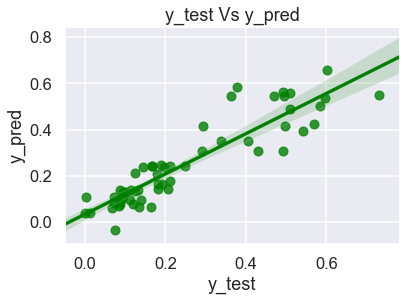

In [96]:
### **** Plot the y_test vs y_pred ***** | Start
area = np.pi*3
sns.regplot(x=y_test, y=y_pred,color='green')
plt.title('y_test Vs y_pred')
plt.ylabel('y_pred')
plt.xlabel('y_test')


plt.show()
### **** Plot the y_test vs y_pred ***** | End

Text(0, 0.5, 'Index')

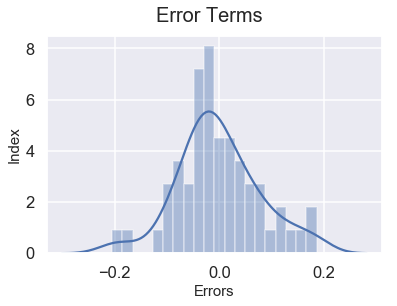

In [97]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 15)
plt.ylabel('Index', fontsize = 15)

<center><h3>Observations after prediction</h3><br><b>The y_test and y_pred are very obeserved to have a almost linear relation in the above scatter plot, the variation occurs mostly at the end, but the model is able predict y value quite well</b>. Now we can calculate the RMSE and R2 values for our further analysis</center>

<center><H3>RMSE and R2 calculation</H3></center>

In [116]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model 1 RMSE value::',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model 1 R2 Score::',r2)

mse=mean_squared_error(y_test, y_pred)
print('Model 1 MSE value::',mse)

Model 1 RMSE value:: 0.07849474928389168
Model 1 R2 Score:: 0.8231883823112074
Model 1 MSE value:: 0.006161425665141013


<center><b>Building another model - by reducing columns</b> </center>

In [99]:
## **** Use the previous data to have a new X_train dataset | Start *****
X_train_r_m2=X_train_r_z
## **** Use the previous data to have a new X_train dataset | End *****

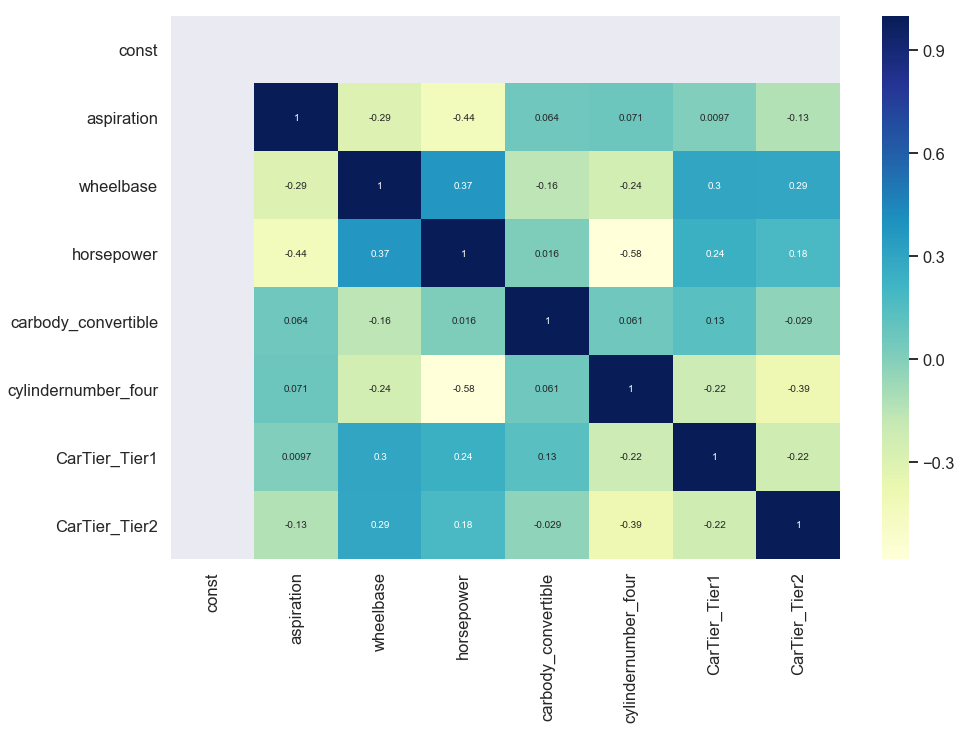

In [100]:
## **** Plot the heatmap to check the correlation | Start *****
plt.figure(figsize=(15,10))
sns.heatmap(X_train_r_m2.corr(),annot=True,cmap='YlGnBu')
## **** Plot the heatmap to check the correlation | End *****

In [101]:
## Drop the feature to check the impact on model ***** Start
X_train_r_m2_1 = X_train_r_m2.drop('aspiration',axis=1)
## Drop the feature to check the impact on model ***** End

In [102]:
modelFit(X_train_r_m2_1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     153.0
Date:                Wed, 08 May 2019   Prob (F-statistic):           2.29e-55
Time:                        20:51:52   Log-Likelihood:                 150.81
No. Observations:                 133   AIC:                            -287.6
Df Residuals:                     126   BIC:                            -267.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0070    

In [103]:
getVIF(X_train_r_m2_1)

              Features    VIF
0                const  21.68
4  cylindernumber_four   1.90
2           horsepower   1.71
6        CarTier_Tier2   1.57
1            wheelbase   1.50
5        CarTier_Tier1   1.45
3  carbody_convertible   1.10


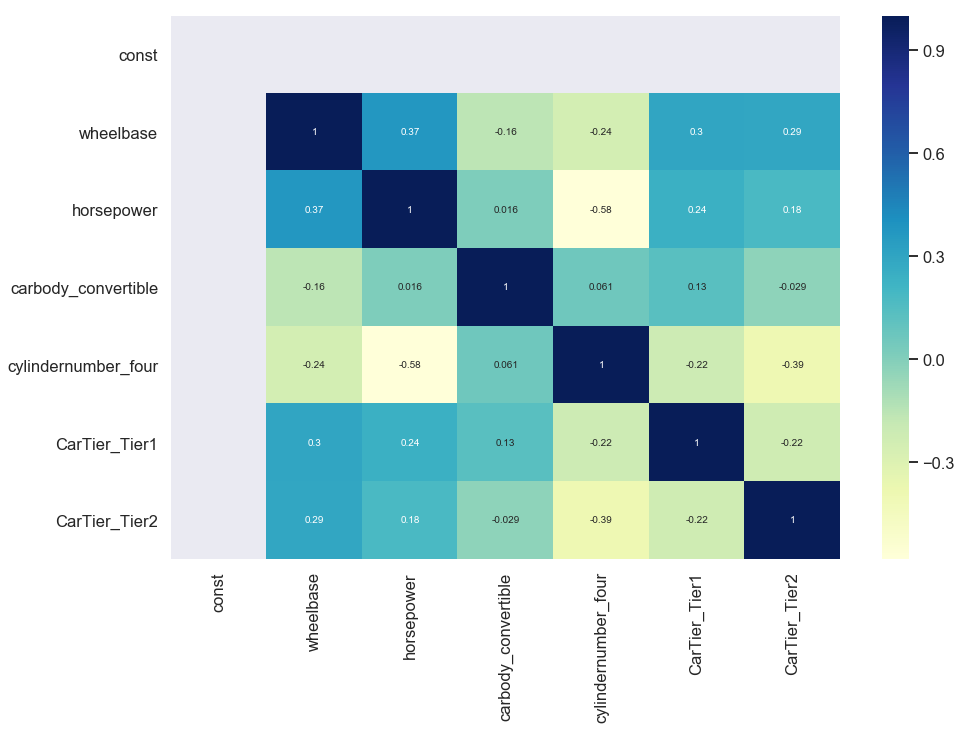

In [104]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_r_m2_1.corr(),annot=True,cmap='YlGnBu')

<center><h3>Observations 1 - Model 2</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.879,0.874 respectively,which are very close and the values are also quite good. We can also see both AIC and BIC scores improved from previous run</b>. <br>
The F-Statistics also increased from previous run<br>
The p-values of the variables are very less now and in range of 0.05, also the VIF scores of the features are also very less</center>

In [105]:
## *** Remove the CarTier_Tier1, which has less impact on the model *** | Start 
X_train_r_m2_2 = X_train_r_m2_1.drop('CarTier_Tier1',axis=1)
## *** Remove the CarTier_Tier1, which has less impact on the model *** | End 

In [106]:
X_train_r_m2_2=sm.add_constant(X_train_r_m2_2)
lm_2=sm.OLS(y_train,X_train_r_m2_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     165.5
Date:                Wed, 08 May 2019   Prob (F-statistic):           7.65e-54
Time:                        20:51:53   Log-Likelihood:                 144.32
No. Observations:                 133   AIC:                            -276.6
Df Residuals:                     127   BIC:                            -259.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0183    

In [107]:
getVIF(X_train_r_m2_2)

              Features    VIF
0                const  20.64
4  cylindernumber_four   1.76
2           horsepower   1.71
1            wheelbase   1.28
5        CarTier_Tier2   1.27
3  carbody_convertible   1.04


<center><h3>Observations 1 - Model 2</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.867,0.862 respectively,which are very close and the values are also quite good. We can also see both AIC and BIC scores improved from previous run</b>. <br>
The F-Statistics also increased from previous run<br>
The p-values of the variables are very less now and in range of 0.05, also the VIF scores of the features are also very less</center>

In [108]:
### **** We do the prediction based on the model | Start
y_train_r_m2_2 = lm_2.predict(X_train_r_m2_2)
### **** We do the prediction based on the model | End

Text(0.5, 0, 'Errors')

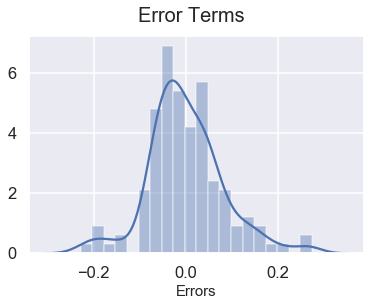

In [109]:
# Plot the histogram of the error 
fig = plt.figure()
sns.distplot((y_train - y_train_r_m2_2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 15)

<center>From the above plot the errors are almost Normally Distributed but have some variations at the tail end. Though it is not centered at 0 , we can still assume the errors are mormally distrbuted based on the above plot. Having said that the errors seems to be more distributed than the previous model, we will look into it further</center>

In [110]:
### **** Drop the constant from the test ***** | Start
X_train_r_m2_3 = X_train_r_m2_2.drop('const',axis=1)
### **** Drop the constant from the test ***** | End

In [111]:
### **** Prepare the X_test ***** | Start
X_test_p_3=X_test[X_train_r_m2_3.columns]
### **** Prepare the X_test ***** | End

In [112]:
### **** Add Constant to X_test ***** | Start
X_test_p_3=sm.add_constant(X_test_p_3)
### **** Add Constant to X_test ***** | End

In [113]:
### **** Predict based on X_test ***** | Start
y_pred_2=lm_2.predict(X_test_p_3)
### **** Predict based on X_test ***** | End

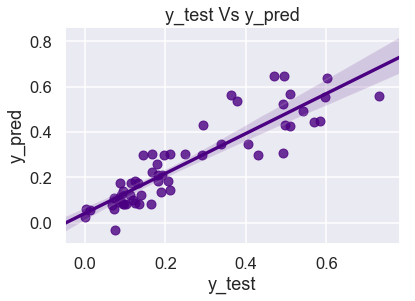

In [114]:
### **** Plot the y_test vs y_pred ***** | Start
area = np.pi*3
sns.regplot(x=y_test, y=y_pred_2,color='indigo')
plt.title('y_test Vs y_pred')
plt.ylabel('y_pred')
plt.xlabel('y_test')



plt.show()
### **** Plot the y_test vs y_pred ***** | End

In [115]:
## *** Get the RMSE and R2 values *** | Start
rmse_2 = sqrt(mean_squared_error(y_test, y_pred_2))
print('Model 2 RMSE value::',rmse_2)

r2_2=r2_score(y_test, y_pred_2)
print('Model 2 R2 Score::',r2_2)
## *** Get the RMSE and R2 values *** | End

Model 2 RMSE value:: 0.08513499168904606
Model 2 R2 Score:: 0.7920084074271314


<center><H3>Model Evaluation</H3></center>

<b><u>Model 1:</u></b><br>
1. RMSE value:: 0.07849474928389168 <br>
2. R2 Score:: 0.8231883823112074 <br>

<br><b><u>Model 2:</u></b><br>
1. RMSE value:: 0.08513499168904606 <br>
2. R2 Score:: 0.7920084074271314 <br>

<b> Conclusion: </b> From the above comparison, though the First Model has more variables but still based on the RMSE and R2 values, first model seems better than the second model.

<center><H3>Final Conclusion</H3></center>

<table>
    <tr>
        <td><b>Predictor</b></td>
        <td><b>Co-efficient value</b></td>
        <td><b>p-value</b></td>
    </tr>
    <tr>
        <td>horsepower</td>
        <td>0.3236</td>
        <td>0.000</td>
    </tr>
    <tr>
        <td>wheelbase</td>
        <td>0.4530</td>
        <td>0.000</td>
    </tr>
    <tr>
        <td>CarTier_Tier1</td>
        <td>0.0666</td>
        <td>0.000</td>
    </tr>
    <tr>
        <td>aspiration</td>
        <td>-0.0754</td>
        <td>0.000</td>
    </tr>
    <tr>
        <td>carbody_convertible</td>
        <td>0.1570</td>
        <td>0.006</td>
    </tr>
    <tr>
        <td>cylindernumber_four</td>
        <td>-0.1210</td>
        <td>0.000</td>
    </tr>
    <tr>
        <td>CarTier_Tier2</td>
        <td>0.3086</td>
        <td>0.000</td>
    </tr>
</table>

<table>
    <tr>
        <td><b>Features</b></td>
        <td><b>VIF</b></td>
    </tr>
    <tr>
        <td>horsepower</td>
        <td>2.16</td>
    </tr>
    <tr>
        <td>cylindernumber_four</td>
        <td>2.04</td>
    </tr>
    <tr>
        <td>CarTier_Tier2</td>
        <td>1.57</td>
    </tr>
    <tr>
        <td>wheelbase</td>
        <td>1.53</td>
    </tr>
    <tr>
        <td>CarTier_Tier1</td>
        <td>1.46</td>
    </tr>
    <tr>
        <td>aspiration</td>
        <td>1.40</td>
    </tr>
    <tr>
        <td>carbody_convertible</td>
        <td>1.10</td>
    </tr>
</table>

<br><br>


<b> The equation of the best fitted line can be given as: </b>
y=0.1066 + 0.3236 X horsepower + 0.4530 X wheelbase + 0.0666 X CarTier_Tier1 - 0.0754 * aspiration + 0.1570 X carbody_convertible - 0.1210 X cylindernumber_four + 0.3086 X CarTier_Tier2



The above equation can be described as follows:<br>
<ul> 
    <li>The car price increments by 0.3236 for every unit change of horsepower. This can also be viewed from Figure 25 above.</li>
    <li>The car price increments by 0.4530 for every unit change of wheelbase. This can also be viewed from Figure 26 above.</li>
    <li>The car price depends on the Tier 1 & Tier 2 of the car (i.e. well branded cars). The car prices change by 0.0666 and 0.3086 for Tier 1 and Tier 2 cars. The Tiers of the cars are as follows. CarTier
Tier0  -->    8893.242105,
Tier1  -->   13231.837209,
Tier2  -->  25384.538462</li>
    <li>The car prices increments by 0.0754 for every unit change aspiration. We can see the graph number 14, that the car prices increases for aspirations - turbo </li>
    <li>The car price decreases by 0.1210, if the car is having 4 cylinders. It can be well related with the Figure -20. This is becasue the cylinder 4 is common for the low end cars</li>
    <li>The price of the car increments by 0.1570 if the car body is convertible.</li>
</ul>
<br><br>
<b>The overall model performs decently but we can still improve the model</b>

The details of the model are below:
<ul>
    <li><b>Adjusted R2 : </b>0.823</li>
    <li><b>R2 : </b>0.862</li>
    <li><b>F-Statistics : </b>1.93e-57</li>
    <li><b>AIC : </b>-301.3</li>
    <li><b>BIC : </b>-278.2</li>
    <li><b>RMSE : </b>0.078</li>
</ul>

<center><h3>Suggestions</h3><br></center>
    The car company Geely Automotives needs to find an optimal price of the cars so that it can create a foothold into the new market of US. The average car price 13276 USD, so the car price can be kept in an around this price and along with it they can also consider the following for capturing the new market. The below can be used to further customize the price offered to the US Customers:<br>
    <ul>
        <li>Car Type: <b>Sedan</b></li>
        <li>Number of Cylinders: <b>Four</b></li>
        <li>Risk measurement: <b>Moderate</b></li>
        <li>Aspiration: <b>Std</b></li>
        <li>Number of Doors: <b>Four</b></li>
        <li>Engine Location: <b>Front</b></li>
        <li>Engine Type: <b>ohc</b></li>
        <li>Fuel System: <b>mpfi</b></li>
    </ul>
<br> 